In [1]:
import pandas as pd
import numpy as np
import json
import os
import re
import matplotlib.pyplot as plt

# stage 1

In [41]:
# 218 corpus size
session_folders = [
    "20241130_215116",
    "20241201_122453",
    "20241220_234554",
    "20250129_155701",
    "20250312_005238",
    "20250312_165021",
    "20250313_175528",
    # "20250317_021315",
    "20250317_073918",
    "20250317_195411",
]

# correct corpus size
session_folders = [
    "20250321_225427",
    "20250322_023705",
    "20250322_121018",
    "20250322_175631",
    # ]
    # # mutation strength
    # session_folders = [
    "20250323_114951",
    "20250324_110355",
    "20250324_120620",
]

# selected 4 matrix
# session_folders = [
#     "20250323_205939",
#     "20250324_110355",
# ]

# # stage 1 plots
# session_folders = [
#     "20250331_010508",
# ]

# session_folders = ["20250404_022837"]
# session_folders = ["20250404_212436"]
# session_folders = ["20250404_225245"]
# session_folders = ["20250405_110614"]

In [42]:
allres = {}
for session_folder in session_folders:
    session_res = {}
    for root, dirs, files in os.walk(f"output\\{session_folder}"):
        for target_dir in dirs:
            if re.match(r"path_[0-9]{3}", target_dir):
                path = f"{root}\\{target_dir}"
                parts = path.split("\\")
                if parts[1] == "20250313_175528":
                    if parts[2] in [
                        "run_004",
                        "run_005",
                        "run_006",
                        "run_010",
                        "run_011",
                        "run_012",
                    ]:
                        print("skipping", path)
                        continue
                if parts[1] == "20250322_175631":
                    if parts[2] in [
                        "run_002",
                        "run_006",
                        "run_010",
                    ]:
                        print("skipping", path)
                        continue
                if parts[1] == "20250323_114951":
                    if parts[2] in [
                        "run_002",
                        "run_006",
                        "run_010",
                    ]:
                        print("skipping", path)
                        continue
                with open(f"{path}\\evaluation_results.json") as f:
                    results = json.load(f)
                with open(f"{path}\\run_config.json") as f:
                    config = json.load(f)
                if parts[2] not in session_res:
                    session_res[parts[2]] = {}
                session_res[parts[2]][parts[3]] = {**results, **config}
    allres[session_folder] = session_res


with open("allres.json", "w") as f:
    json.dump(allres, f)

allres

skipping output\20250322_175631\run_002\path_001
skipping output\20250322_175631\run_002\path_002
skipping output\20250322_175631\run_002\path_003
skipping output\20250322_175631\run_002\path_004
skipping output\20250322_175631\run_002\path_005
skipping output\20250322_175631\run_006\path_001
skipping output\20250322_175631\run_006\path_002
skipping output\20250322_175631\run_006\path_003
skipping output\20250322_175631\run_006\path_004
skipping output\20250322_175631\run_006\path_005
skipping output\20250322_175631\run_010\path_001
skipping output\20250322_175631\run_010\path_002
skipping output\20250322_175631\run_010\path_003
skipping output\20250322_175631\run_010\path_004
skipping output\20250322_175631\run_010\path_005
skipping output\20250323_114951\run_002\path_001
skipping output\20250323_114951\run_002\path_002
skipping output\20250323_114951\run_002\path_003
skipping output\20250323_114951\run_002\path_004
skipping output\20250323_114951\run_002\path_005
skipping output\2025

{'20250321_225427': {'run_001': {'path_001': {'functional_variance': [0.01585742200211739,
     0.015859224231510198,
     0.013742426051908995,
     0.014245492450618269,
     0.01197107294997407,
     0.012098964882080598,
     0.011455046907244198,
     0.011319083378510784,
     0.011001182756691484,
     0.010497585219785284,
     0.00950260851633311,
     0.009123522643564207,
     0.009066749764636693,
     0.008675674812942768,
     0.007675128446554587,
     0.007444997208672986,
     0.007302288717938984,
     0.007249329259748046,
     0.0068309492461363685,
     0.006894420239363048,
     0.007633153404393171,
     0.007781017897132417,
     0.007736028963889686,
     0.007786494549071928,
     0.007712833953762628,
     0.007368195471301821,
     0.007648149623916607,
     0.007423541826534165,
     0.007222266139310318,
     0.005618618060959119,
     0.005282568675138506,
     0.004915205522834586,
     0.0044051665094148795,
     0.004647196834850016,
     0.00451619012

In [43]:
df = pd.DataFrame.from_dict(
    {
        (i, j, k): allres[i][j][k]
        for i in allres.keys()
        for j in allres[i].keys()
        for k in allres[i][j].keys()
    },
    orient="index",
)

df

functional_variance  \
20250321_225427 run_001 path_001  [0.01585742200211739, 0.015859224231510198, 0....   
                        path_002  [0.01586240852490865, 0.015568764240801272, 0....   
                        path_003  [0.016444492569529547, 0.01567107865765912, 0....   
                        path_004  [0.015150930026224965, 0.01718728140105986, 0....   
                        path_005  [0.01359219269348757, 0.012272763529405829, 0....   
...                                                                             ...   
20250323_114951 run_012 path_004  [0.01559182782502002, 0.015670668989066442, 0....   
                        path_005  [0.016458877596532275, 0.016996763226690793, 0...   
20250324_110355 run_001 path_001  [0.014209790230301382, 0.01624324482630395, 0....   
20250324_120620 run_001 path_001  [0.014195774508621401, 0.012754768700896875, 0...   
                run_002 path_001  [0.015845196071446736, 0.014609291181272322, 0...   

                                                      phylo_diversity_novelty_index  \
20250321_225427 run_001 path_001  {'phylo_diversity_novelty_index': 11.340470932...   
                        path_002  {'phylo_diversity_novelty_index': 10.271673748...   
                        path_003  {'phylo_diversity_novelty_index': 9.6870494128...   
                        path_004  {'phylo_diversity_novelty_index': 11.116035761...   
                        path_005  {'phylo_diversity_novelty_index': 10.196101214...   
...                                                                             ...   
20250323_114951 run_012 path_004  {'phylo_diversity_novelty_index': 2.7065957448...   
                        path_005  {'phylo_diversity_novelty_index': 1.9261823802...   
20250324_110355 run_001 path_001  {'phylo_diversity_novelty_index': 2.3378109405...   
20250324_120620 run_001 path_001  {'phylo_diversity_novelty_index': 9.7806927130...   
                run_002 path_001  {'phylo_diversity_novelty_index': 2.9852551573...   

                                                categorical_diversity_novelty_index  \
20250321_225427 run_001 path_001  {'categorical_diversity_novelty_index': None, ...   
                        path_002  {'categorical_diversity_novelty_index': None, ...   
                        path_003  {'categorical_diversity_novelty_index': None, ...   
                        path_004  {'categorical_diversity_novelty_index': None, ...   
                        path_005  {'categorical_diversity_novelty_index': None, ...   
...                                                                             ...   
20250323_114951 run_012 path_004  {'categorical_diversity_novelty_index': None, ...   
                        path_005  {'categorical_diversity_novelty_index': None, ...   
20250324_110355 run_001 path_001  {'categorical_diversity_novelty_index': None, ...   
20250324_120620 run_001 path_001  {'categorical_diversity_novelty_index': None, ...   
                run_002 path_001  {'categorical_diversity_novelty_index': None, ...   

                                  dataset_coverage  category_coverage  \
20250321_225427 run_001 path_001          5.009032          62.536023   
                        path_002          5.614412          62.824207   
                        path_003          5.411805          70.317003   
                        path_004          5.570473          71.757925   
                        path_005          4.640434          60.806916   
...                                            ...                ...   
20250323_114951 run_012 path_004         43.580042          96.541787   
                        path_005         43.963287          97.118156   
20250324_110355 run_001 path_001         13.967681          87.319885   
20250324_120620 run_001 path_001          6.044037          71.469741   
                run_002 path_001         43.328614          95.100865   

                                  start_timestamp se

In [44]:
# convert dict to df, with columns run, path, and phylo_diversity_novelty_index columns


df["root_contribution_index"] = df["phylo_diversity_novelty_index"].apply(
    lambda x: x["root_contribution_index"]
)
df["mean_pairwise_distance"] = df["phylo_diversity_novelty_index"].apply(
    lambda x: x["mean_pairwise_distance"]
)
df["phylo_diversity_novelty_index"] = df["phylo_diversity_novelty_index"].apply(
    lambda x: x["phylo_diversity_novelty_index"]
)

df["categorical_diversity"] = df["categorical_diversity_novelty_index"].apply(
    lambda x: x["categorical_diversity"]
)
df["category_change_rate"] = df["categorical_diversity_novelty_index"].apply(
    lambda x: x["category_change_rate"]
)
df["categorical_diversity_novelty_index"] = df[
    "categorical_diversity_novelty_index"
].apply(lambda x: x["categorical_diversity_novelty_index"])
# df["dataset_coverage"] = df["dataset_coverage"]  # .mul(100)
df["category_change_rate"] = df["category_change_rate"].apply(
    lambda x: [np.nan if i is None else float(i) for i in x]
)
df["categorical_diversity_novelty_index"] = df[
    "categorical_diversity_novelty_index"
].apply(lambda x: np.nan if x is None else float(x))

In [45]:
list_cols_to_convert = [
    "phylo_diversity_novelty_index",
    "categorical_diversity_novelty_index",
    "category_change_rate",
    "dataset_coverage",
    "category_coverage",
    "category_coverage_allmids",
    "root_contribution_index",
    "mean_pairwise_distance",
    "crossover_rate",
    "mutation_rate",
    "mutation_scale",
    "population_size",
]

for col in list_cols_to_convert:
    print(col)
    print(df[col].dtype)
    # input()

phylo_diversity_novelty_index
float64
categorical_diversity_novelty_index
float64
category_change_rate
object
dataset_coverage
float64
category_coverage
float64
category_coverage_allmids
float64
root_contribution_index
float64
mean_pairwise_distance
float64
crossover_rate
float64
mutation_rate
float64
mutation_scale
float64
population_size
int64


In [46]:
df.to_csv(f"plot_output/allres_stage1.csv")

## agg

In [47]:
df = pd.read_csv("plot_output/allres_stage1.csv", index_col=[0, 1, 2])
df["category_change_rate"] = df["category_change_rate"].apply(
    lambda x: [float(i) for i in x.strip("[]").split(", ")]
)
df["functional_variance"] = df["functional_variance"].apply(
    lambda x: [float(i) for i in x.strip("[]").split(", ")]
)
df["categorical_diversity"] = df["categorical_diversity"].apply(
    lambda x: [float(i) for i in x.strip("[]").split(", ")]
)


def mean_of_lists(series):
    return np.nanmean(np.vstack(series), axis=0)


agg_map = {
    "functional_variance": mean_of_lists,
    "phylo_diversity_novelty_index": "mean",
    "categorical_diversity_novelty_index": "mean",
    "category_change_rate": mean_of_lists,
    "dataset_coverage": "mean",
    "category_coverage": "mean",
    "category_coverage_allmids": "mean",
    "root_contribution_index": "mean",
    "mean_pairwise_distance": "mean",
    "crossover_rate": "first",
    "mutation_rate": "first",
    "mutation_scale": "first",
    "population_size": "first",
    "projection_method": "first",
    "categorical_diversity": mean_of_lists,
}


df_plot = df.groupby(level=[0, 1]).agg(agg_map)


df_plot

C:\Users\memis\AppData\Local\Temp\ipykernel_15704\4023812809.py:14: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.vstack(series), axis=0)


functional_variance  \
20250321_225427 run_001  [0.015381489163253626, 0.015311822412087256, 0...   
                run_002  [0.015187678500281337, 0.014935028143112834, 0...   
                run_003  [0.015586960745344996, 0.015226908848837008, 0...   
                run_004  [0.015203630902205145, 0.014982396887418637, 0...   
                run_005  [0.014469864896239974, 0.014363833629382709, 0...   
                run_006  [0.015627115277300402, 0.015333847789852098, 0...   
20250322_023705 run_001  [0.014658428901297005, 0.013748134099974312, 0...   
                run_002  [0.015718569652963862, 0.01615301275069173, 0....   
                run_003  [0.015110687428750528, 0.015057310924467635, 0...   
                run_004  [0.0149213331027287, 0.014046657784245676, 0.0...   
                run_005  [0.013627335204583679, 0.01385947341377702, 0....   
                run_006  [0.015884314614662335, 0.015130300146588912, 0...   
20250322_121018 run_001  [0.01588899934935766, 0.015027657215296242, 0....   
                run_002  [0.016146559131353315, 0.0155653554811405, 0.0...   
                run_003  [0.015657629274496758, 0.014892402112414901, 0...   
                run_004  [0.01542827699130774, 0.015300455892273393, 0....   
                run_005  [0.01576546088856465, 0.015087702047330315, 0....   
                run_006  [0.015106907078577847, 0.014794330038454049, 0...   
20250322_175631 run_001  [0.01409724940859056, 0.012791923847171403, 0....   
                run_003  [0.01655960461699069, 0.01718889774006191, 0.0...   
                run_004  [0.020237896905025872, 0.01659834022187049, 0....   
                run_005  [0.012975237242560517, 0.012331370579778905, 0...   
                run_007  [0.016551117201582137, 0.017182180229907144, 0...   
                run_008  [0.019788859788666156, 0.01756351153029433, 0....   
                run_009  [0.014955730204934478, 0.014310113620133865, 0...   
                run_011  [0.016043161532251903, 0.017182475854245958, 0...   
                run_012  [0.0194995933053413, 0.01952725364073603, 0.01...   
20250323_114951 run_001  [0.01538582377471212, 0.014579358288376998, 0....   
                run_003  [0.016393242537517304, 0.015235493672926492, 0...   
                run_004  [0.015252094023150744, 0.015357807054306723, 0...   
                run_005  [0.015345188368142932, 0.016021223495336454, 0...   
                run_007  [0.01567556439372151, 0.015026964036998214, 0....   
                run_008  [0.01591078140684061, 0.014647480490819575, 0....   
                run_009  [0.01592699328580287, 0.015736743200633674, 0....   
                run_011  [0.015062981312945006, 0.015015210467509255, 0...   
                run_012  [0.015331172631966674, 0.015431015605265292, 0...   
20250324_110355 run_001  [0.014209790230301382, 0.01624324482630395, 0....   
20250324_120620 run_001  [0.014195774508621401, 0.012754768700896875, 0...   
                run_002  [0.015845196071446736, 0.014609291181272322, 0...   

                         phylo_diversity_novelty_index  \
20250321_225427 run_001                      10.522266   
                run_002                       0.735103   
                run_003                      13.774640   
                run_004                       8.990914   
                run_005                       9.199801   
                run_006                       0.602987   
20250322_023705 run_001                      10.843929   
                run_002                       0.868432   
                run_003                      14.717544   
                run_004                       9.004574   
                run_005                       9.227431   
                run_006                       0.634781   
20250322_121018 run_001                      10.226681   
                run_002                       2.077846   
                run_003                       3.612563   
      

## plot metrics

### plot final metrics

<Figure size 640x480 with 0 Axes>

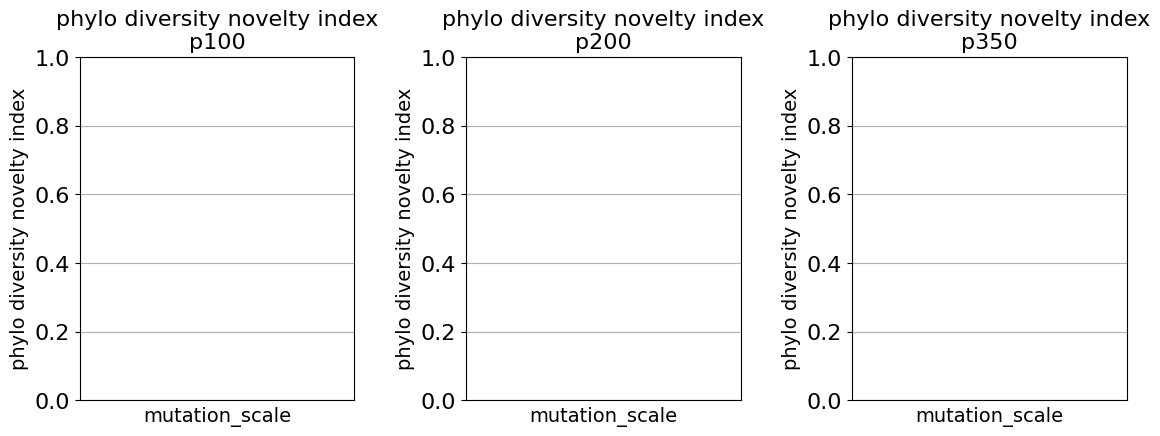

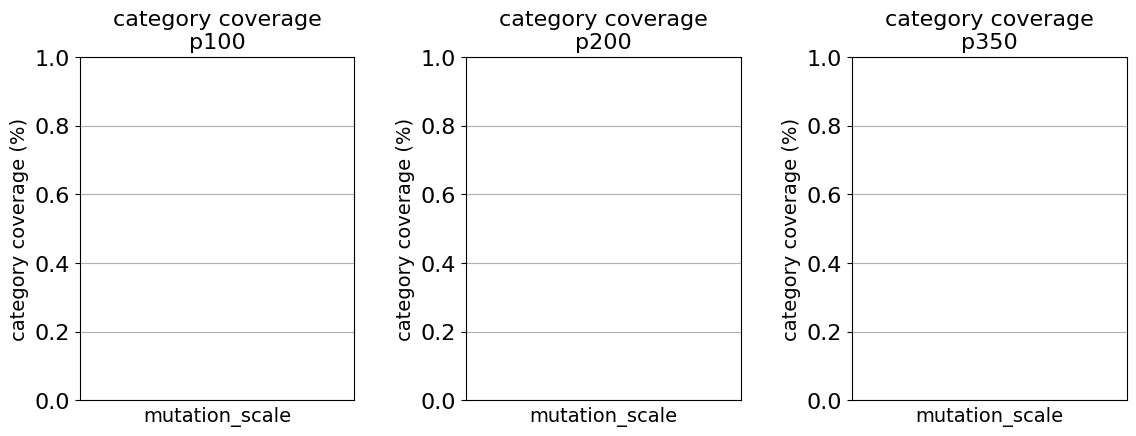

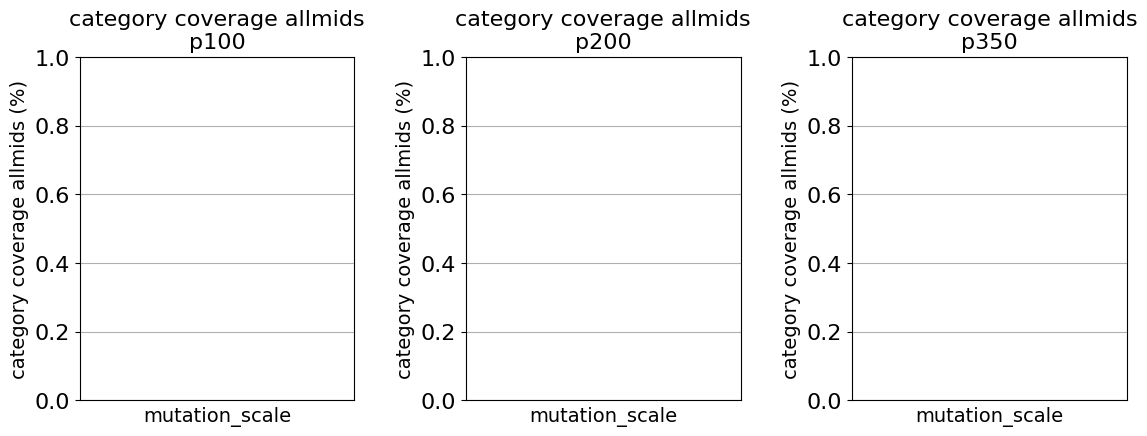

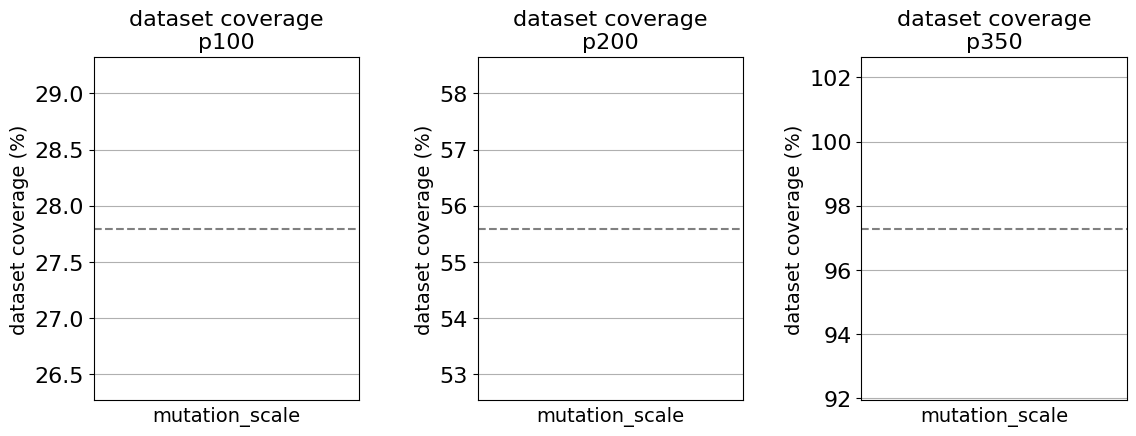

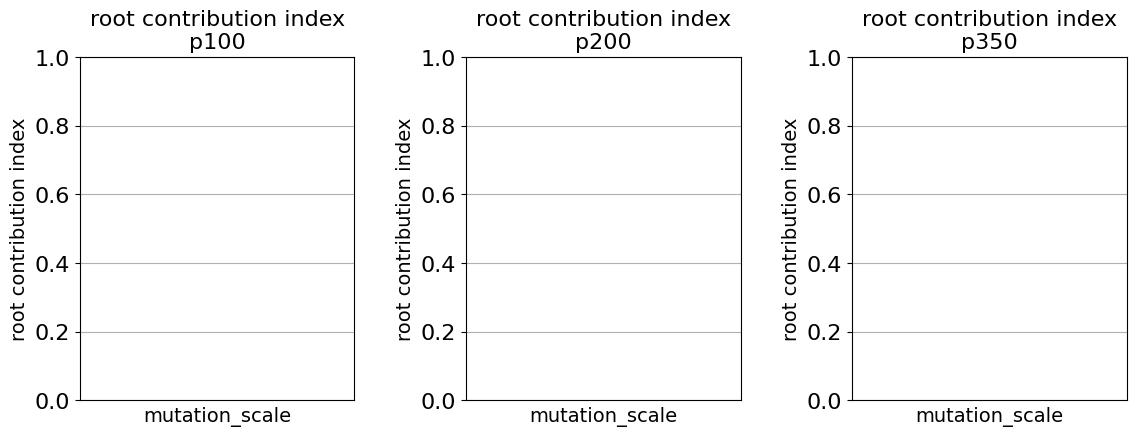

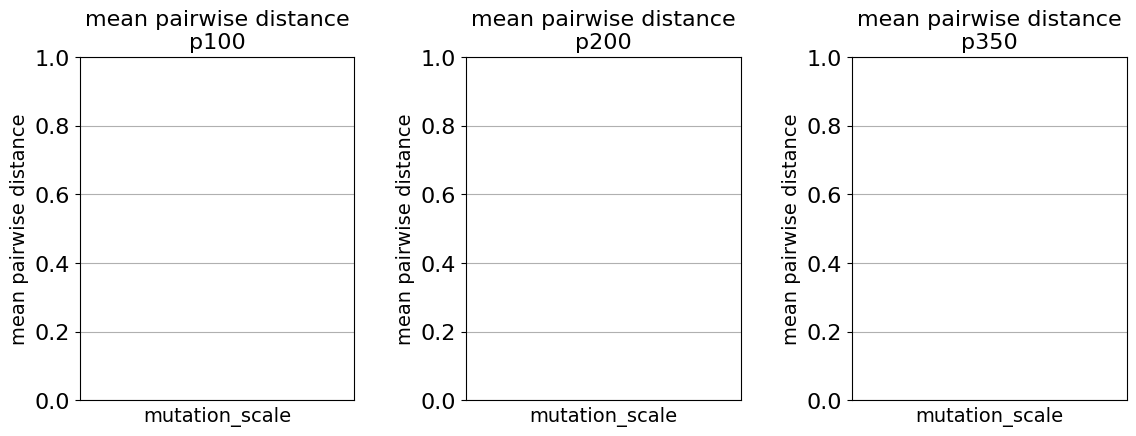

In [48]:
plt.clf()

# plot for each popsize
popsize = 100
popsize = 150
popsize = 200
popsize = 350
popsize = 500
popsizes = [100, 200, 350, 500]
popsizes = [100, 150, 200, 350, 500]
popsizes = [100, 200]
popsizes = [100, 200, 350]


# metric
metric = "phylo_diversity_novelty_index"
metric = "category_coverage"
metric = "category_coverage_allmids"
metric = "dataset_coverage"
metric = "category_change_rate"
metric = "functional_variance"
metrics = [
    "phylo_diversity_novelty_index",
    # "categorical_diversity_novelty_index",
    "category_coverage",
    "category_coverage_allmids",
    "dataset_coverage",
    # "category_change_rate",
    "root_contribution_index",
    "mean_pairwise_distance",
    # "functional_variance",
]


# crossover rate
target_metric_val = 0.5
target_metric_val = 0.65
target_metric_val = 0.8
corates = [0.5, 0.65, 0.8]
corates = [0.5, 0.8]

# mutation rate
mutation_rate = 0.01
mutation_rate = 0.05
murates = [0.01, 0.025, 0.05]  # , 0.1, 0.3]

# mutation scale
mutation_scale = 0.01
mutation_scale = 0.025
mutation_scale = 0.05
mutation_scale = 0.1
mutation_scale = 0.3
muscales = [0.01, 0.025, 0.05, 0.1, 0.3]

metric_lim_map = {
    "phylo_diversity_novelty_index": (0, 20),
    "category_coverage": (0, 100),
    "category_coverage_allmids": (0, 100),
    "dataset_coverage": (0, 100),
    "root_contribution_index": (0, 8),
    "mean_pairwise_distance": (0, 8),
}


metric_y_suffix_map = {
    "phylo_diversity_novelty_index": "",
    "category_coverage": " (%)",
    "category_coverage_allmids": " (%)",
    "dataset_coverage": " (%)",
    "root_contribution_index": "",
    "mean_pairwise_distance": "",
}


colors = {"pca": "red", "tsne": "blue", "umap": "green"}

target_metric = "mutation_rate"
target_metric = "crossover_rate"
target_metric = "mutation_scale"

for metric in metrics:
    plots = 3
    fig, axs = plt.subplots(1, plots, figsize=(4 * plots, 5))
    for i, popsize in enumerate(popsizes):

        df_plot_sub = df_plot[
            [
                "phylo_diversity_novelty_index",
                "categorical_diversity_novelty_index",
                "category_change_rate",
                "dataset_coverage",
                "category_coverage",
                "category_coverage_allmids",
                "root_contribution_index",
                "mean_pairwise_distance",
                "crossover_rate",
                "mutation_rate",
                "mutation_scale",
                "population_size",
                "projection_method",
            ]
        ].copy()

        df_plot_sub = df_plot_sub[df_plot_sub["population_size"] == popsize]
        df_plot_sub = df_plot_sub[df_plot_sub["projection_method"] == "pca"]

        # df_plot_sub = df_plot_sub[df_plot_sub["mutation_scale"].isin(muscales)]

        if target_metric == "crossover_rate":
            df_plot_sub = df_plot_sub[df_plot_sub["mutation_rate"] == 0.05]
            df_plot_sub = df_plot_sub[df_plot_sub["mutation_scale"] == 0.05]
        if target_metric == "mutation_rate":
            df_plot_sub = df_plot_sub[df_plot_sub["crossover_rate"] == 0.05]
            df_plot_sub = df_plot_sub[df_plot_sub["mutation_scale"] == 0.05]
        if target_metric == "mutation_scale":
            df_plot_sub = df_plot_sub[df_plot_sub["crossover_rate"] == 0.05]
            df_plot_sub = df_plot_sub[df_plot_sub["mutation_rate"] == 0.05]
        # print(df_plot_sub)
        # scatter plot x-axis as the crossover rate, y-axis as the metric
        # and color by the projection method
        # fig, ax = plt.subplots(figsize=(6, 4))

        for run_i, group in df_plot_sub.groupby("projection_method"):
            axs[i].scatter(
                group[target_metric],
                group[metric],
                label=run_i,
                alpha=0.75,
                s=125,
                # c=colors[proj_i]
            )

        # # plot theoretical maximum
        if metric == "dataset_coverage":
            theo_max = popsize * 100 / 35976 * 100
            axs[i].axhline(
                theo_max,
                color="gray",
                linestyle="--",
                label="Theoretical maximum",
            )

        # Ensure the data is sorted by crossover_rate before plotting
        df_plot_sub = df_plot_sub.sort_values(by=target_metric)
        axs[i].set_xticks(sorted(df_plot_sub[target_metric].unique()))

        if target_metric == "crossover_rate":
            axs[i].set_xlim(0.275, 1.025)  # co 2
            # axs[i].set_xlim(0.4, 0.9)  # co 3
        elif target_metric == "mutation_scale":
            # axs[i].set_xlim(0, 0.06)  # ms
            pass

        axs[i].set_xticklabels(
            [str(x) for x in sorted(df_plot_sub[target_metric].unique())]
        )

        axs[i].set_xlabel(target_metric, fontsize=14)

        axs[i].set_ylabel(
            metric.replace("_", " ") + metric_y_suffix_map[metric], fontsize=14
        )

        axs[i].set_title(
            f"{metric.replace('_', ' ')}\np{popsize}",  # by projection method
            fontsize=16,
        )

        # axs[i].set_ylim(*metric_lim_map[metric])
        axs[i].tick_params(axis="both", which="major", labelsize=16)
        axs[i].grid()
        # axs[i].legend(fontsize=14)

    # plt.legend(fontsize=14)

    plt.tight_layout(pad=3.0)

    plt.savefig(f"plot_output/{metric}_by_{target_metric}.png")

    plt.show()

### plot array metrics

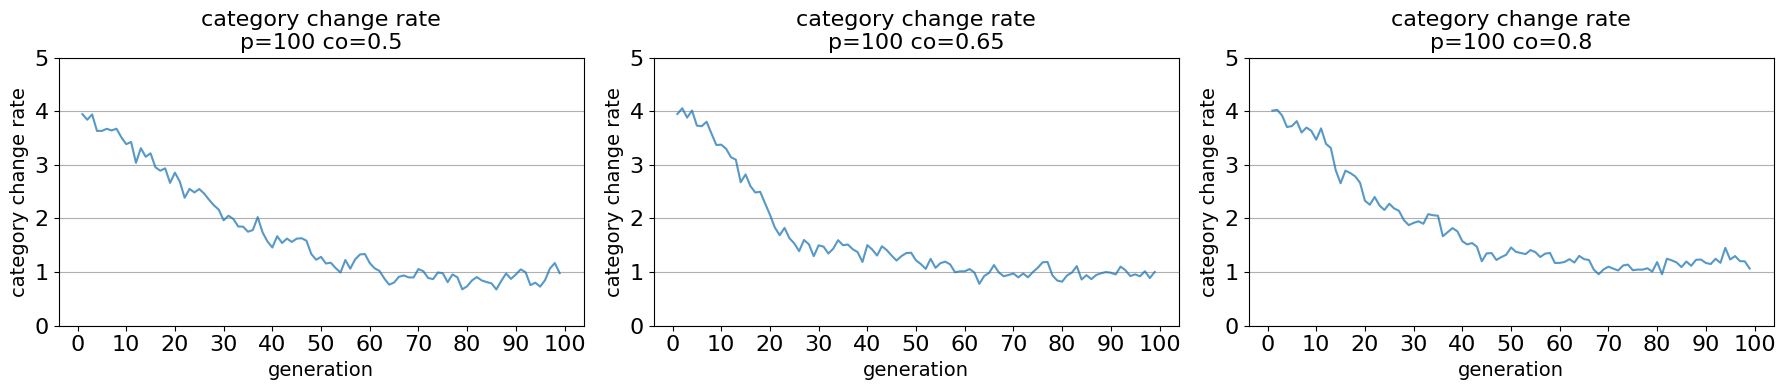

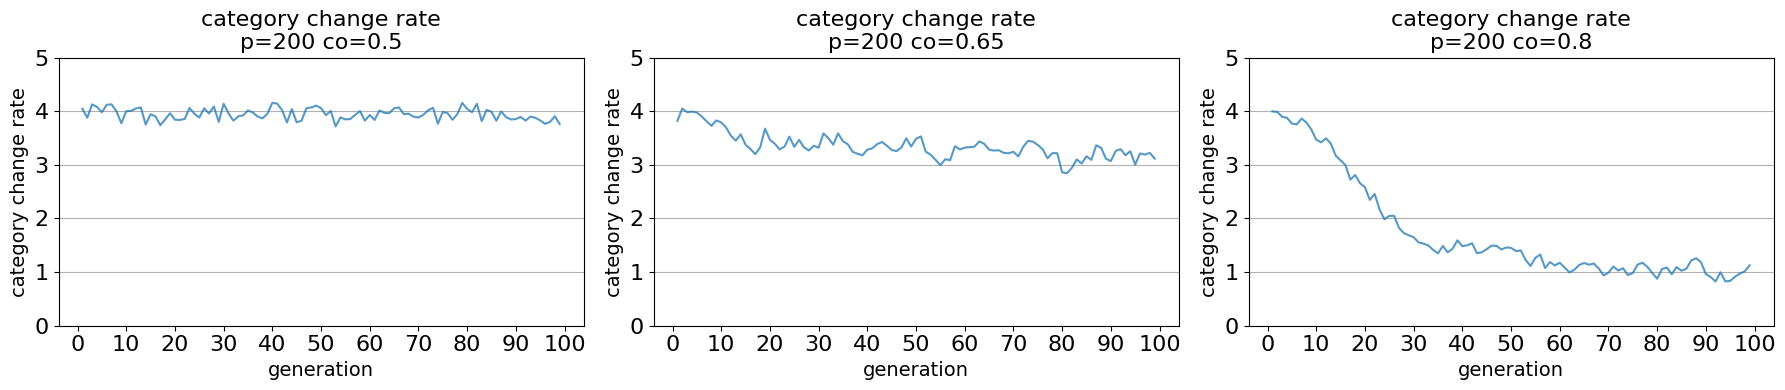

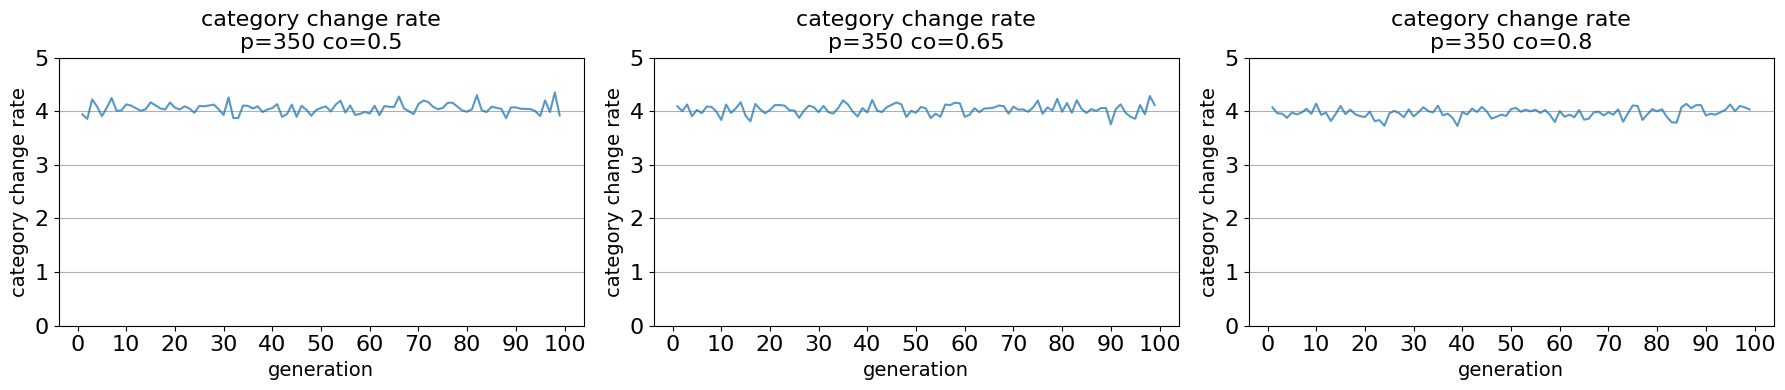

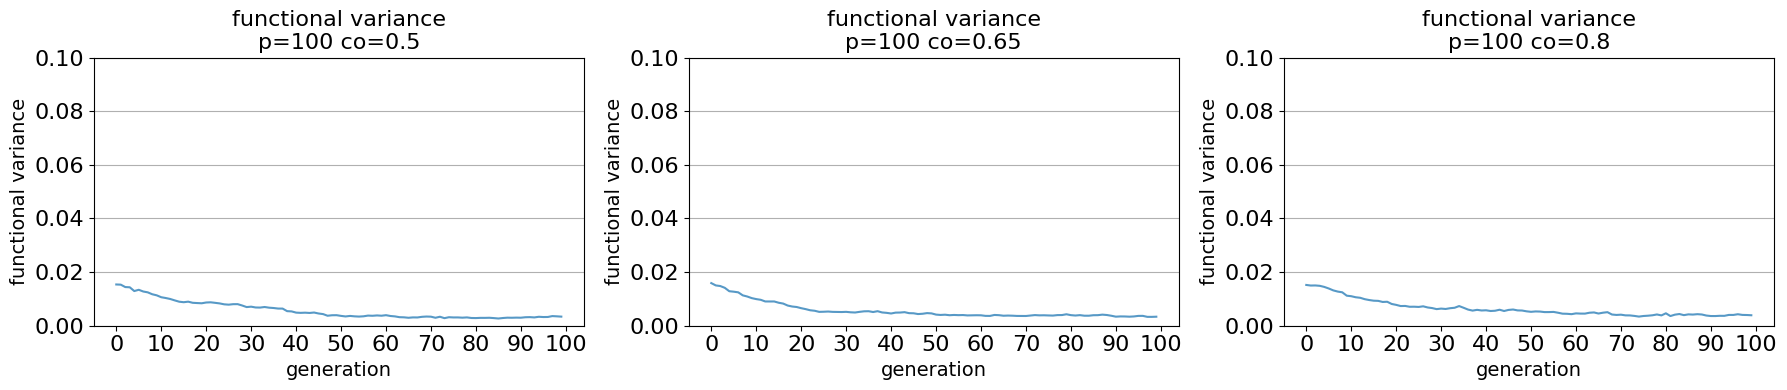

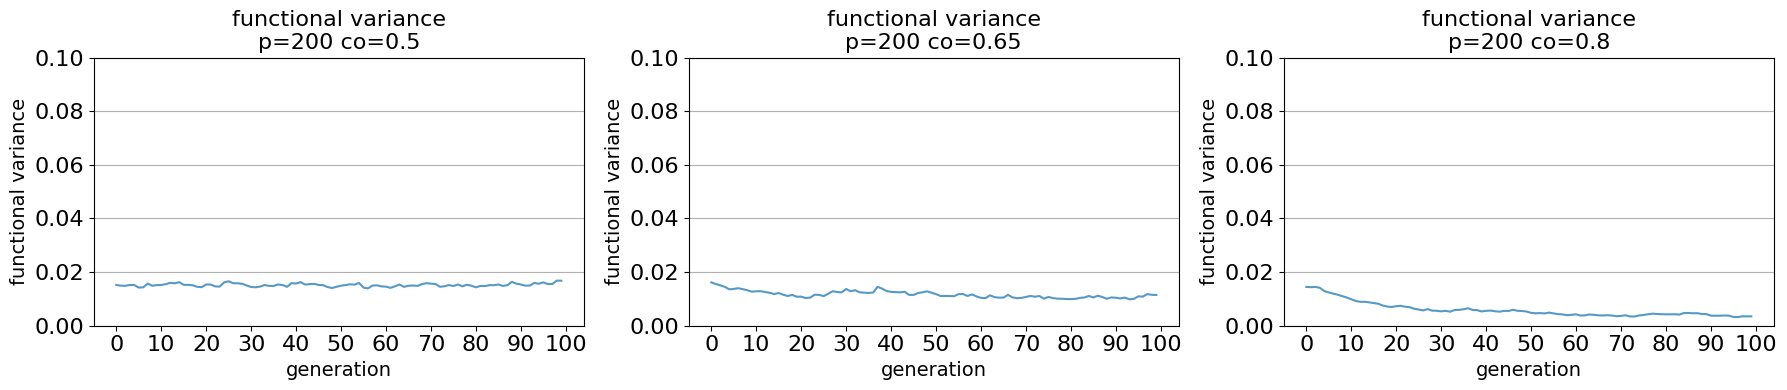

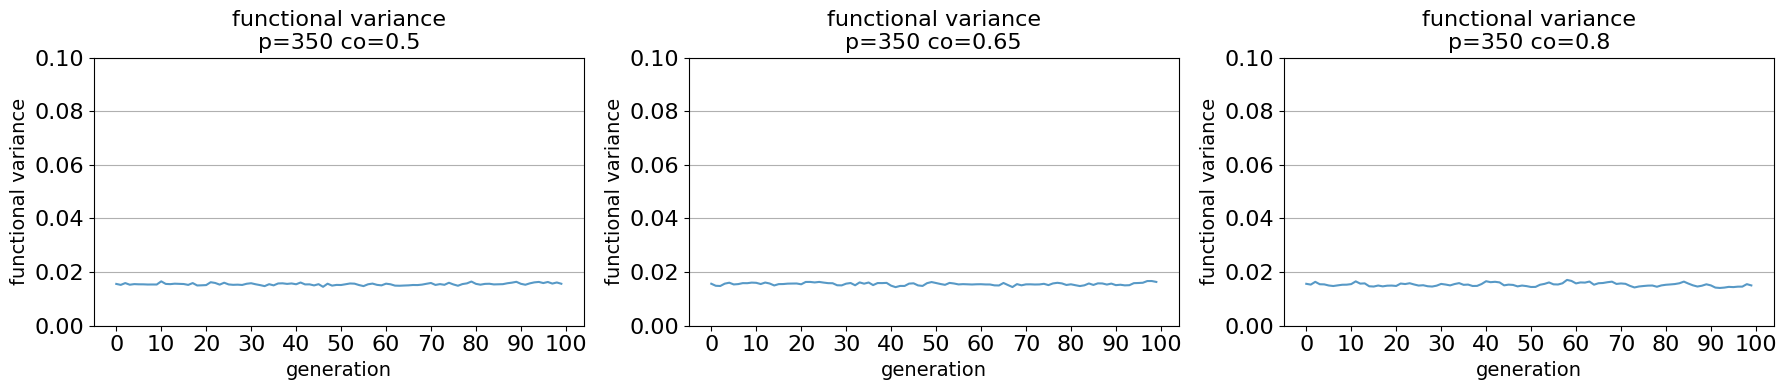

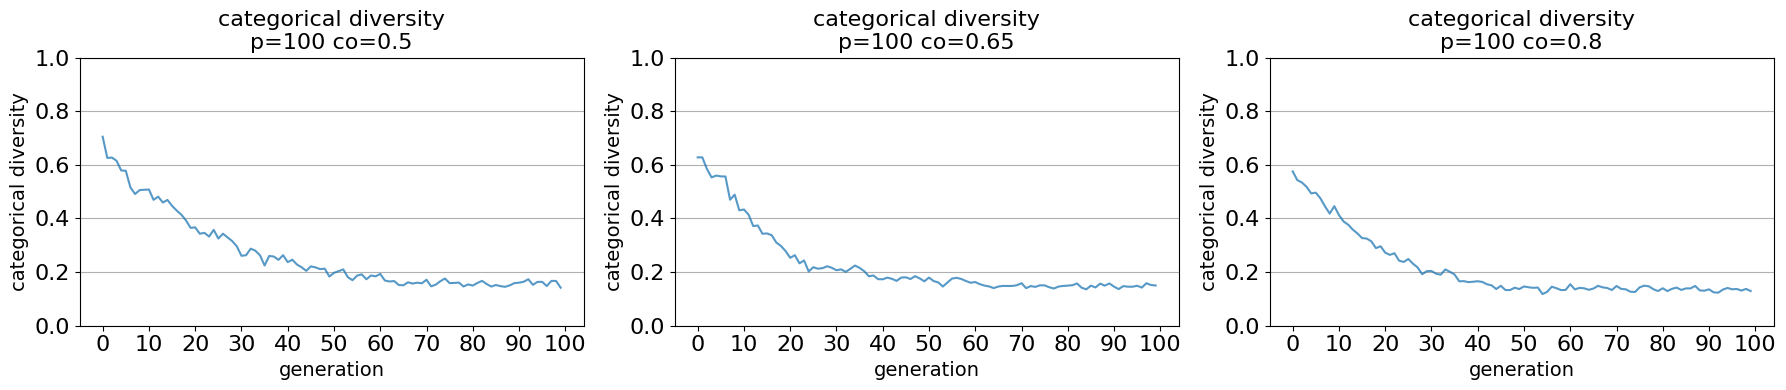

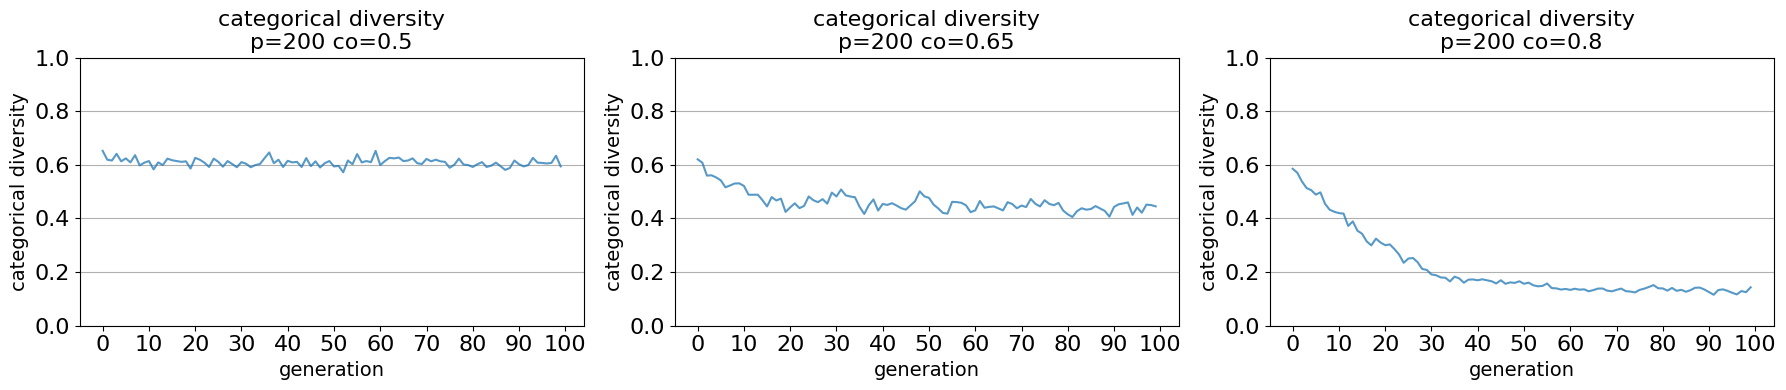

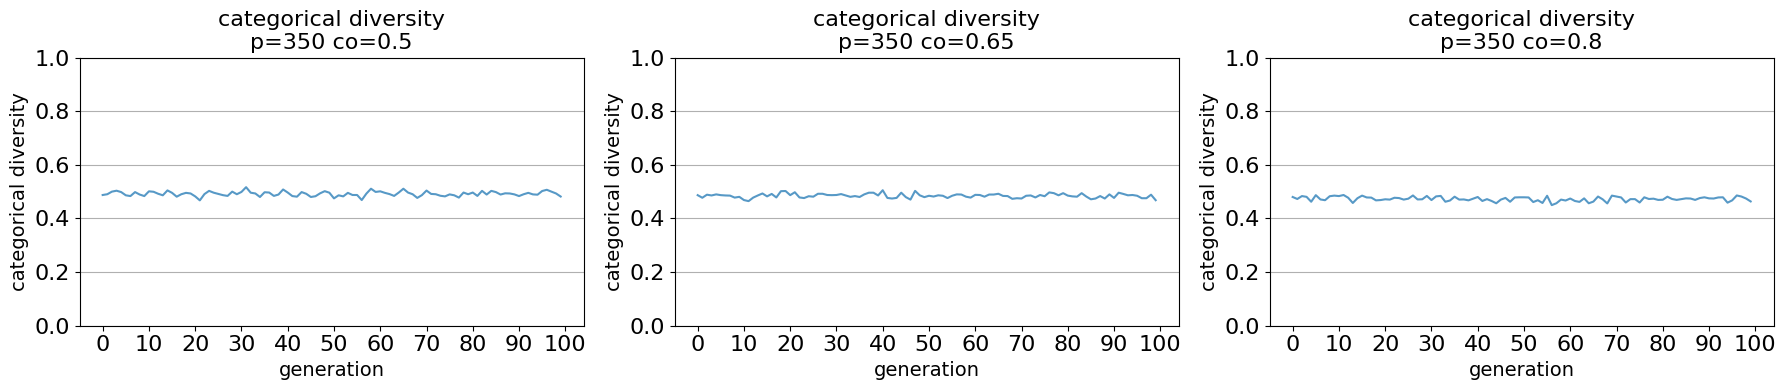

In [49]:
# plot a scatter plot, x axis being the runs, ie index level 1, and y axis
# being the amount. plot projection_method as color

# metric
metric = "phylo_diversity_novelty_index"
meetric = "categor_coverage_allmids"
metric = "dataset_coverage"
metric = "category_change_rate"
metric = "functional_variance"
metrics = [
    # "phylo_diversity_novelty_index",
    # "categorical_diversity_novelty_index",
    # "category_coverage",
    # "dataset_coverage",
    "category_change_rate",
    # "root_contribution_index",
    # "mean_pairwise_distance",
    "functional_variance",
    "categorical_diversity",
]
metric_lim_map = {
    "category_coverage": (0, 100),
    "dataset_coverage": (0, 100),
    "category_change_rate": (0, 5),
    "functional_variance": (0, 0.1),
    "categorical_diversity": (0, 1),
}
metric_y_suffix_map = {
    "category_coverage": " (%)",
    "dataset_coverage": " (%)",
    "category_change_rate": "",
    "functional_variance": "",
    "categorical_diversity": "",
}
parameter_abbrev_map = {
    "crossover_rate": "co",
    "mutation_rate": "mr",
    "mutation_scale": "ms",
}

colors = {
    "pca": "red",
    "tsne": "blue",
    "umap": "green",
    "isomap": "orange",
}

metric_default_val_map = {
    "crossover_rate": 0.65,
    "mutation_rate": 0.05,
    "mutation_scale": 0.05,
    # "projection_method": "pca",
}

metric_values_range_map = {
    "crossover_rate": [0.5, 0.65, 0.8],
    # "crossover_rate": [0.5, 0.8],
    "mutation_rate": [0.01, 0.05, 0.1, 0.3],
    "mutation_scale": [0.01, 0.025, 0.05],  # , 0.1, 0.3],
}

popsizes = [100, 200, 350]  # , 500]

# select the target metric to plot
target_metric = "mutation_rate"
target_metric = "mutation_scale"
target_metric = "crossover_rate"

for metric in metrics:
    for popsize in popsizes:
        fig, axs = plt.subplots(1, 3, figsize=(18, 4))
        for i, target_metric_val in enumerate(
            metric_values_range_map[target_metric]
        ):
            df_plot_sub = df_plot[
                [
                    "phylo_diversity_novelty_index",
                    "categorical_diversity_novelty_index",
                    "category_change_rate",
                    "dataset_coverage",
                    "category_coverage",
                    "root_contribution_index",
                    "mean_pairwise_distance",
                    "crossover_rate",
                    "mutation_rate",
                    "mutation_scale",
                    "population_size",
                    "projection_method",
                    "functional_variance",
                    "categorical_diversity",
                ]
            ].copy()

            df_plot_sub = df_plot_sub[df_plot_sub["population_size"] == popsize]
            df_plot_sub = df_plot_sub[
                df_plot_sub["projection_method"] == "pca"
            ]  ####

            for metr, val in metric_default_val_map.items():
                if metr != target_metric:
                    df_plot_sub = df_plot_sub[df_plot_sub[metr] == val]

            df_plot_sub = df_plot_sub[
                df_plot_sub[target_metric] == target_metric_val
            ]

            # fig, ax = plt.subplots(figsize=(6, 4))
            for run_i, group in df_plot_sub.groupby("projection_method"):
                axs[i].plot(
                    group[metric].iloc[0],
                    label=run_i,
                    # color=colors[i],
                    alpha=0.75,
                )
            # axs[i].legend()
            axs[i].set_xlabel("generation", fontsize=14)
            axs[i].set_ylabel(
                metric.replace("_", " ") + metric_y_suffix_map[metric],
                fontsize=14,
            )
            axs[i].set_title(
                f"{metric.replace('_', ' ')}\n"  # } by projection method
                f"p={popsize} {parameter_abbrev_map[target_metric]}={target_metric_val}",
                fontsize=16,
            )
            axs[i].set_ylim(*metric_lim_map[metric])
            axs[i].set_xticks(np.arange(0, 101, 10))
            axs[i].tick_params(axis="both", which="major", labelsize=16)
            # add horizontal grid
            axs[i].grid(axis="y")
        # plt.legend(fontsize=14)
        plt.tight_layout()
        plt.savefig(f"plot_output/{metric}_p{popsize}_{target_metric}.png")
        plt.show()

# stage 2

In [81]:
# 218 corpus size
session_folders = [
    "20241130_215116",
    "20241201_122453",
    "20241220_234554",
    "20250129_155701",
    "20250312_005238",
    "20250312_165021",
    "20250313_175528",
    # "20250317_021315",
    "20250317_073918",
    "20250317_195411",
]

# correct corpus size
session_folders = [
    "20250321_225427",
    "20250322_023705",
    "20250322_121018",
    "20250322_175631",
    # ]
    # # mutation strength
    # session_folders = [
    "20250323_114951",
    "20250324_110355",
    "20250324_120620",
]

# selected 4 matrix
session_folders = [
    "20250323_205939",
    "20250324_191625",
    # "20250324_205555",
    # "20250325_032128",
    "20250325_032128",
    "20250406_015118",
    "20250406_093323",
]

In [82]:
allres = {}
for session_folder in session_folders:
    session_res = {}
    for root, dirs, files in os.walk(f"output\\{session_folder}"):
        for target_dir in dirs:
            if re.match(r"path_[0-9]{3}", target_dir):
                path = f"{root}\\{target_dir}"
                parts = path.split("\\")
                if parts[1] == "20250313_175528":
                    if parts[2] in [
                        "run_004",
                        "run_005",
                        "run_006",
                        "run_010",
                        "run_011",
                        "run_012",
                    ]:
                        print("skipping", path)
                        continue
                if parts[1] == "20250322_175631":
                    if parts[2] in [
                        "run_002",
                        "run_006",
                        "run_010",
                    ]:
                        print("skipping", path)
                        continue
                if parts[1] == "20250323_114951":
                    if parts[2] in [
                        "run_002",
                        "run_006",
                        "run_010",
                    ]:
                        print("skipping", path)
                        continue
                with open(f"{path}\\evaluation_results.json") as f:
                    results = json.load(f)
                with open(f"{path}\\run_config.json") as f:
                    config = json.load(f)
                if parts[2] not in session_res:
                    session_res[parts[2]] = {}
                session_res[parts[2]][parts[3]] = {**results, **config}
    allres[session_folder] = session_res


with open("allres.json", "w") as f:
    json.dump(allres, f)

allres

{'20250323_205939': {'run_001': {'path_001': {'functional_variance': [0.015121241806213262,
     0.013700951691342866,
     0.012999020876654893,
     0.012587211686996449,
     0.011384827700886155,
     0.010832517370856365,
     0.010266457385774518,
     0.009572375292242395,
     0.009368229142030345,
     0.008788320908353325,
     0.009546166544489608,
     0.009027604266188422,
     0.00793851654545646,
     0.008831059009171532,
     0.008768178975673323,
     0.008480918811184393,
     0.007644459953815491,
     0.00708704010523348,
     0.005870217282490046,
     0.004899801831289707,
     0.00485409879108538,
     0.004487927171983271,
     0.004380294711609844,
     0.004724314110756989,
     0.004527941009634817,
     0.004480713084033603,
     0.004416435232464191,
     0.004066278566497374,
     0.003914448394001605,
     0.004296633014376823,
     0.004199834614424366,
     0.0036112503239181756,
     0.003098415989957542,
     0.0032313963522498366,
     0.00357519036

In [83]:
df = pd.DataFrame.from_dict(
    {
        (i, j, k): allres[i][j][k]
        for i in allres.keys()
        for j in allres[i].keys()
        for k in allres[i][j].keys()
    },
    orient="index",
)

df

functional_variance  \
20250323_205939 run_001 path_001  [0.015121241806213262, 0.013700951691342866, 0...   
                run_002 path_001  [0.01718325454866558, 0.013893353806755273, 0....   
                run_003 path_001  [0.015529286653419822, 0.015655328706679673, 0...   
                run_004 path_001  [0.01709059030207365, 0.016730019157247446, 0....   
20250324_191625 run_001 path_001  [0.01659261841846004, 0.015652147966683294, 0....   
                run_002 path_001  [0.01533481909505859, 0.015975775272543274, 0....   
                run_003 path_001  [0.01434140765496067, 0.015270353060947034, 0....   
                run_004 path_001  [0.014111445875585488, 0.012312047984631355, 0...   
20250325_032128 run_001 path_001  [0.01710010781824426, 0.014575811351457885, 0....   
                run_002 path_001  [0.01713167218782416, 0.017927283396098156, 0....   
                run_003 path_001  [0.014852951944115235, 0.014279075413493297, 0...   
                run_004 path_001  [0.015439323408231433, 0.013844030418418724, 0...   
20250406_015118 run_001 path_001  [0.018332120478761395, 0.016846958005392147, 0...   
                run_002 path_001  [0.016891778368644004, 0.01599924057759632, 0....   
                run_003 path_001  [0.01326941747737895, 0.0120568586506239, 0.01...   
                run_004 path_001  [0.01646692150708962, 0.016453780594681635, 0....   
20250406_093323 run_001 path_001  [0.02044236737853833, 0.019807620589915708, 0....   
                run_002 path_001  [0.01460693890598714, 0.01563954200592713, 0.0...   
                run_003 path_001  [0.011878838338905047, 0.014117620792344215, 0...   
                run_004 path_001  [0.015978038336711742, 0.014624187754115748, 0...   

                                                      phylo_diversity_novelty_index  \
20250323_205939 run_001 path_001  {'phylo_diversity_novelty_index': 9.6081798571...   
                run_002 path_001  {'phylo_diversity_novelty_index': 2.5925230250...   
                run_003 path_001  {'phylo_diversity_novelty_index': 9.2709896712...   
                run_004 path_001  {'phylo_diversity_novelty_index': 0.6383215300...   
20250324_191625 run_001 path_001  {'phylo_diversity_novelty_index': 8.7796319662...   
                run_002 path_001  {'phylo_diversity_novelty_index': 2.7195116433...   
                run_003 path_001  {'phylo_diversity_novelty_index': 9.9996094163...   
                run_004 path_001  {'phylo_diversity_novelty_index': 0.7820087391...   
20250325_032128 run_001 path_001  {'phylo_diversity_novelty_index': 8.4014203473...   
                run_002 path_001  {'phylo_diversity_novelty_index': 2.1904676462...   
                run_003 path_001  {'phylo_diversity_novelty_index': 8.6024359444...   
                run_004 path_001  {'phylo_diversity_novelty_index': 0.7502578179...   
20250406_015118 run_001 path_001  {'phylo_diversity_novelty_index': 9.1519915598...   
                run_002 path_001  {'phylo_diversity_novelty_index': 2.9007105981...   
                run_003 path_001  {'phylo_diversity_novelty_index': 8.8822062637...   
                run_004 path_001  {'phylo_diversity_novelty_index': 0.7275445330...   
20250406_093323 run_001 path_001  {'phylo_diversity_novelty_index': 9.3147554451...   
                run_002 path_001  {'phylo_diversity_novelty_index': 2.3736165692...   
                run_003 path_001  {'phylo_diversity_novelty_index': 8.7335618840...   
                run_004 path_001  {'phylo_diversity_novelty_index': 0.7482772383...   

                                                categorical_diversity_novelty_index  \
20250323_205939 run_001 path_001  {'categorical_diversity_novelty_index': None, ...   
                run_002 path_001  {'categorical_diversity_novelty_index': None, ...   
                run_003 path_001  {'categorical_diversity_novelty_index': None, ...   
                run_004 path_001  {'categorical_diversity_no

In [84]:
# convert dict to df, with columns run, path, and phylo_diversity_novelty_index columns


df["root_contribution_index"] = df["phylo_diversity_novelty_index"].apply(
    lambda x: x["root_contribution_index"]
)
df["mean_pairwise_distance"] = df["phylo_diversity_novelty_index"].apply(
    lambda x: x["mean_pairwise_distance"]
)
df["phylo_diversity_novelty_index"] = df["phylo_diversity_novelty_index"].apply(
    lambda x: x["phylo_diversity_novelty_index"]
)

df["categorical_diversity"] = df["categorical_diversity_novelty_index"].apply(
    lambda x: x["categorical_diversity"]
)
df["category_change_rate"] = df["categorical_diversity_novelty_index"].apply(
    lambda x: x["category_change_rate"]
)
df["categorical_diversity_novelty_index"] = df[
    "categorical_diversity_novelty_index"
].apply(lambda x: x["categorical_diversity_novelty_index"])
# df["dataset_coverage"] = df["dataset_coverage"]  # .mul(100)
df["category_change_rate"] = df["category_change_rate"].apply(
    lambda x: [np.nan if i is None else float(i) for i in x]
)
df["categorical_diversity_novelty_index"] = df[
    "categorical_diversity_novelty_index"
].apply(lambda x: np.nan if x is None else float(x))

In [85]:
list_cols_to_convert = [
    "phylo_diversity_novelty_index",
    "categorical_diversity_novelty_index",
    "category_change_rate",
    "dataset_coverage",
    "category_coverage",
    "category_coverage_allmids",
    "root_contribution_index",
    "mean_pairwise_distance",
    "crossover_rate",
    "mutation_rate",
    "mutation_scale",
    "population_size",
]

for col in list_cols_to_convert:
    print(col)
    print(df[col].dtype)
    # input()

phylo_diversity_novelty_index
float64
categorical_diversity_novelty_index
float64
category_change_rate
object
dataset_coverage
float64
category_coverage
float64
category_coverage_allmids
float64
root_contribution_index
float64
mean_pairwise_distance
float64
crossover_rate
float64
mutation_rate
float64
mutation_scale
float64
population_size
int64


In [86]:
df.to_csv(f"plot_output/allres_stage2.csv")

## agg

In [87]:
df = pd.read_csv("plot_output/allres_stage2.csv", index_col=[0, 1, 2])
df["category_change_rate"] = df["category_change_rate"].apply(
    lambda x: [float(i) for i in x.strip("[]").split(", ")]
)
df["functional_variance"] = df["functional_variance"].apply(
    lambda x: [float(i) for i in x.strip("[]").split(", ")]
)
df["categorical_diversity"] = df["categorical_diversity"].apply(
    lambda x: [float(i) for i in x.strip("[]").split(", ")]
)


def mean_of_lists(series):
    return np.nanmean(np.vstack(series), axis=0)


agg_map = {
    "functional_variance": mean_of_lists,
    "phylo_diversity_novelty_index": "mean",
    "categorical_diversity_novelty_index": "mean",
    "category_change_rate": mean_of_lists,
    "dataset_coverage": "mean",
    "category_coverage": "mean",
    "category_coverage_allmids": "mean",
    "root_contribution_index": "mean",
    "mean_pairwise_distance": "mean",
    "crossover_rate": "first",
    "mutation_rate": "first",
    "mutation_scale": "first",
    "population_size": "first",
    "projection_method": "first",
    "unique_closest_in_corpus": "first",
    "categorical_diversity": mean_of_lists,
}


df_plot = df.groupby(level=[0, 1]).agg(agg_map)


df_plot

C:\Users\memis\AppData\Local\Temp\ipykernel_15704\30501087.py:14: RuntimeWarning: Mean of empty slice
  return np.nanmean(np.vstack(series), axis=0)


functional_variance  \
20250323_205939 run_001  [0.015121241806213262, 0.013700951691342866, 0...   
                run_002  [0.01718325454866558, 0.013893353806755273, 0....   
                run_003  [0.015529286653419822, 0.015655328706679673, 0...   
                run_004  [0.01709059030207365, 0.016730019157247446, 0....   
20250324_191625 run_001  [0.01659261841846004, 0.015652147966683294, 0....   
                run_002  [0.01533481909505859, 0.015975775272543274, 0....   
                run_003  [0.01434140765496067, 0.015270353060947034, 0....   
                run_004  [0.014111445875585488, 0.012312047984631355, 0...   
20250325_032128 run_001  [0.01710010781824426, 0.014575811351457885, 0....   
                run_002  [0.01713167218782416, 0.017927283396098156, 0....   
                run_003  [0.014852951944115235, 0.014279075413493297, 0...   
                run_004  [0.015439323408231433, 0.013844030418418724, 0...   
20250406_015118 run_001  [0.018332120478761395, 0.016846958005392147, 0...   
                run_002  [0.016891778368644004, 0.01599924057759632, 0....   
                run_003  [0.01326941747737895, 0.0120568586506239, 0.01...   
                run_004  [0.01646692150708962, 0.016453780594681635, 0....   
20250406_093323 run_001  [0.02044236737853833, 0.019807620589915708, 0....   
                run_002  [0.01460693890598714, 0.01563954200592713, 0.0...   
                run_003  [0.011878838338905047, 0.014117620792344215, 0...   
                run_004  [0.015978038336711742, 0.014624187754115748, 0...   

                         phylo_diversity_novelty_index  \
20250323_205939 run_001                       9.608180   
                run_002                       2.592523   
                run_003                       9.270990   
                run_004                       0.638322   
20250324_191625 run_001                       8.779632   
                run_002                       2.719512   
                run_003                       9.999609   
                run_004                       0.782009   
20250325_032128 run_001                       8.401420   
                run_002                       2.190468   
                run_003                       8.602436   
                run_004                       0.750258   
20250406_015118 run_001                       9.151992   
                run_002                       2.900711   
                run_003                       8.882206   
                run_004                       0.727545   
20250406_093323 run_001                       9.314755   
                run_002                       2.373617   
                run_003                       8.733562   
                run_004                       0.748277   

                         categorical_diversity_novelty_index  \
20250323_205939 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250324_191625 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250325_032128 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250406_015118 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250406_093323 run_001                                  NaN   
                run_002                      

In [88]:
# plot 1
mutation_rate = 0.1
mutation_scale = 0.1
popsize = 150
crossover_rate = 0.8

# plot 2
mutation_rate = 0.1
mutation_scale = 0.1
popsize = 150
crossover_rate = 0.5

# plot 3
mutation_rate = 0.05
mutation_scale = 0.05
popsize = 200
crossover_rate = 0.8

# plot 4
mutation_rate = 0.05
mutation_scale = 0.05
popsize = 200
crossover_rate = 0.5

In [89]:
df_plot_sub = df_plot[
    [
        "phylo_diversity_novelty_index",
        "categorical_diversity_novelty_index",
        "category_change_rate",
        "dataset_coverage",
        "category_coverage",
        "root_contribution_index",
        "mean_pairwise_distance",
        "crossover_rate",
        "mutation_rate",
        "mutation_scale",
        "population_size",
        "projection_method",
        "functional_variance",
        "categorical_diversity",
        "unique_closest_in_corpus",
    ]
].copy()

df_plot_sub

phylo_diversity_novelty_index  \
20250323_205939 run_001                       9.608180   
                run_002                       2.592523   
                run_003                       9.270990   
                run_004                       0.638322   
20250324_191625 run_001                       8.779632   
                run_002                       2.719512   
                run_003                       9.999609   
                run_004                       0.782009   
20250325_032128 run_001                       8.401420   
                run_002                       2.190468   
                run_003                       8.602436   
                run_004                       0.750258   
20250406_015118 run_001                       9.151992   
                run_002                       2.900711   
                run_003                       8.882206   
                run_004                       0.727545   
20250406_093323 run_001                       9.314755   
                run_002                       2.373617   
                run_003                       8.733562   
                run_004                       0.748277   

                         categorical_diversity_novelty_index  \
20250323_205939 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250324_191625 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250325_032128 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250406_015118 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   
20250406_093323 run_001                                  NaN   
                run_002                                  NaN   
                run_003                                  NaN   
                run_004                                  NaN   

                                                      category_change_rate  \
20250323_205939 run_001  [nan, 4.078985507246377, 4.076041666666667, 4....   
                run_002  [nan, 4.1963541666666675, 3.6446360153256703, ...   
                run_003  [nan, 4.5589439655172415, 4.001666666666667, 4...   
                run_004  [nan, 4.023214285714285, 3.994517543859649, 4....   
20250324_191625 run_001  [nan, 4.050925925925926, 4.047701149425287, 3....   
                run_002  [nan, 3.958434959349594, 3.7873376623376624, 4...   
                run_003  [nan, 3.915458937198068, 4.053921568627451, 3....   
                run_004  [nan, 3.7442708333333328, 3.7475427350427344, ...   
20250325_032128 run_001  [nan, 4.462389380530974, 4.372787610619469, 4....   
                run_002  [nan, 4.051666666666667, 4.259132420091324, 4....   
                run_003  [nan, 4.1648550724637685, 4.142252604166666, 4...   
                run_004  [nan, 4.600961538461538, 4.517361111111111, 4....   
20250406_015118 run_001  [nan, 4.231333333333333, 4.239965277777777, 3....   
                run_002  [nan, 4.172453703703703, 4.277412280701755, 4....   
                run_003  [nan, 4.312146892655367, 4.304459064327485, 4....   
                run_004  [nan, 4.233796296296296, 3.928645833333333, 4....   
20250406_093323 run_001  [nan, 3.9108072916666665, 3.7295026881720434, ...   
                run_002  [nan, 4.217414529914531, 4.13253

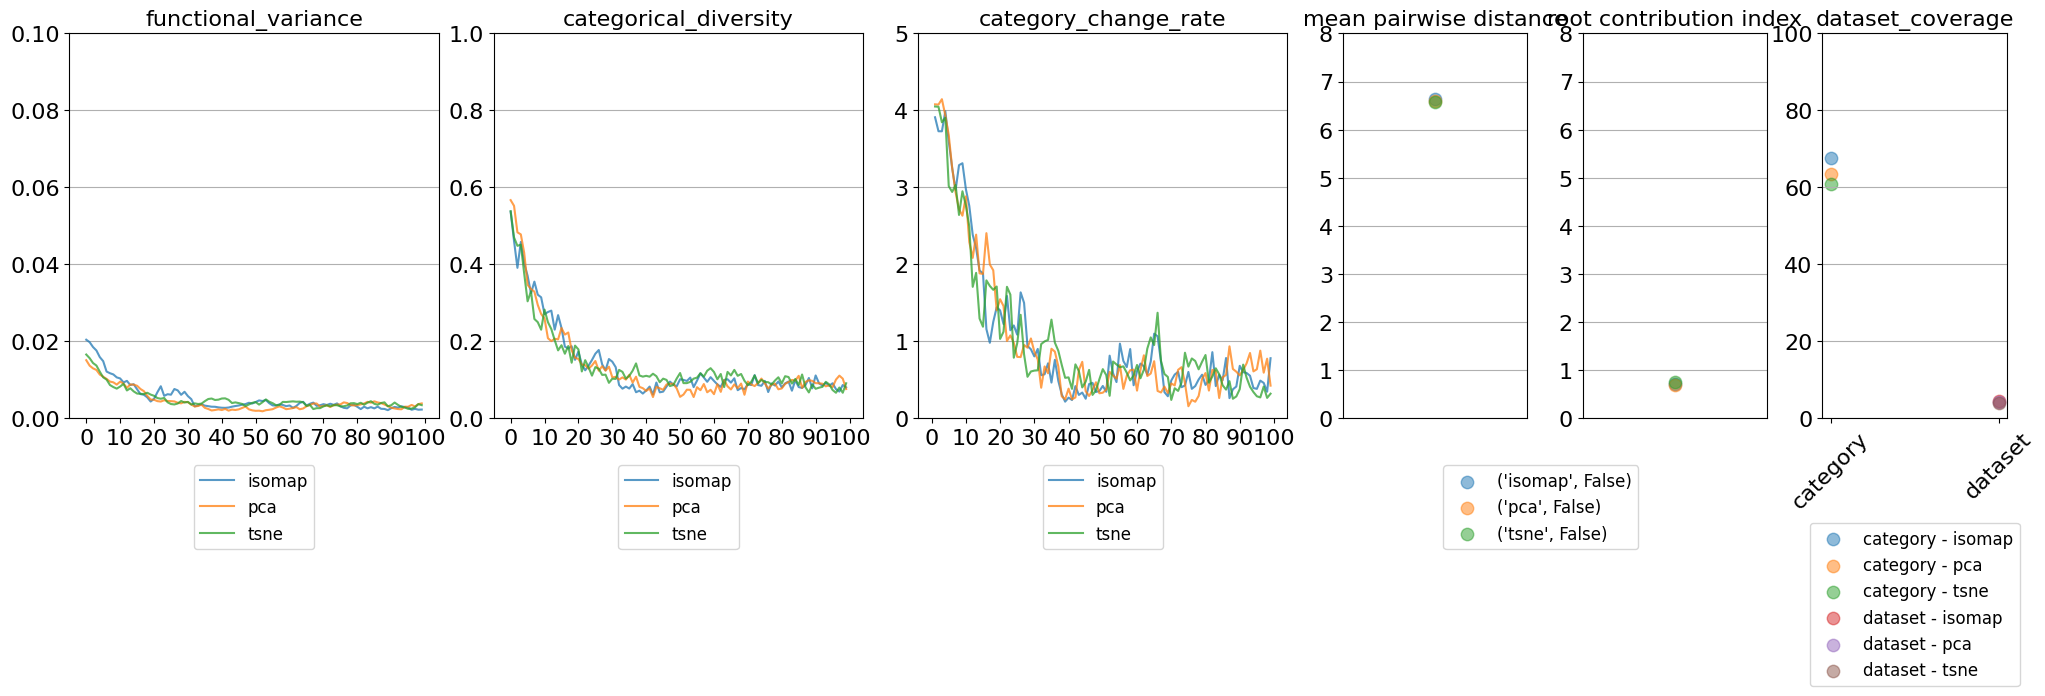

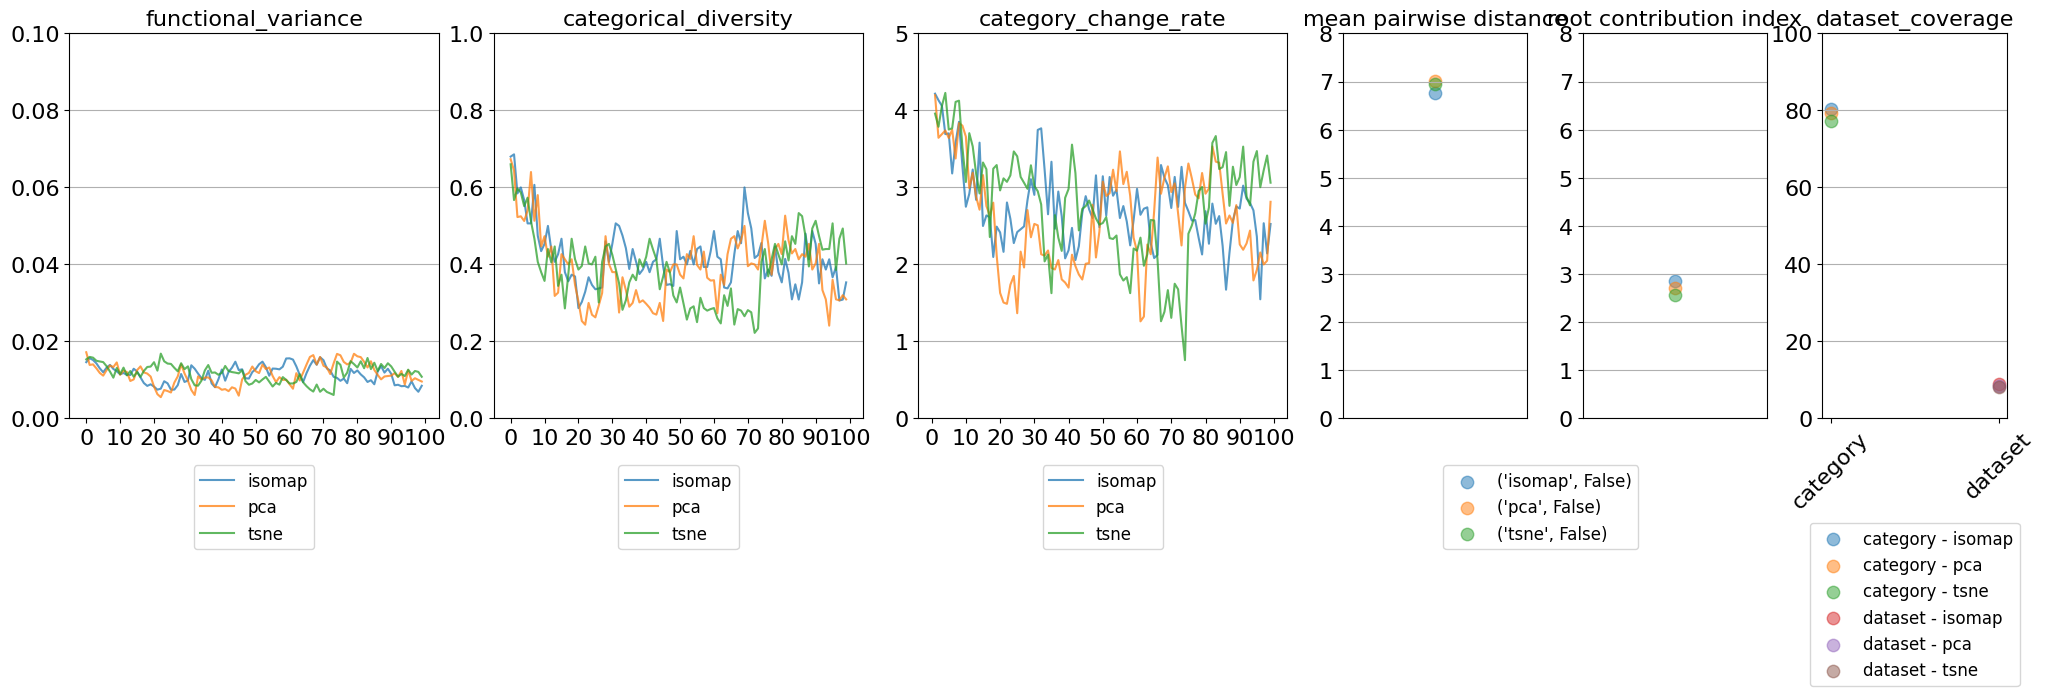

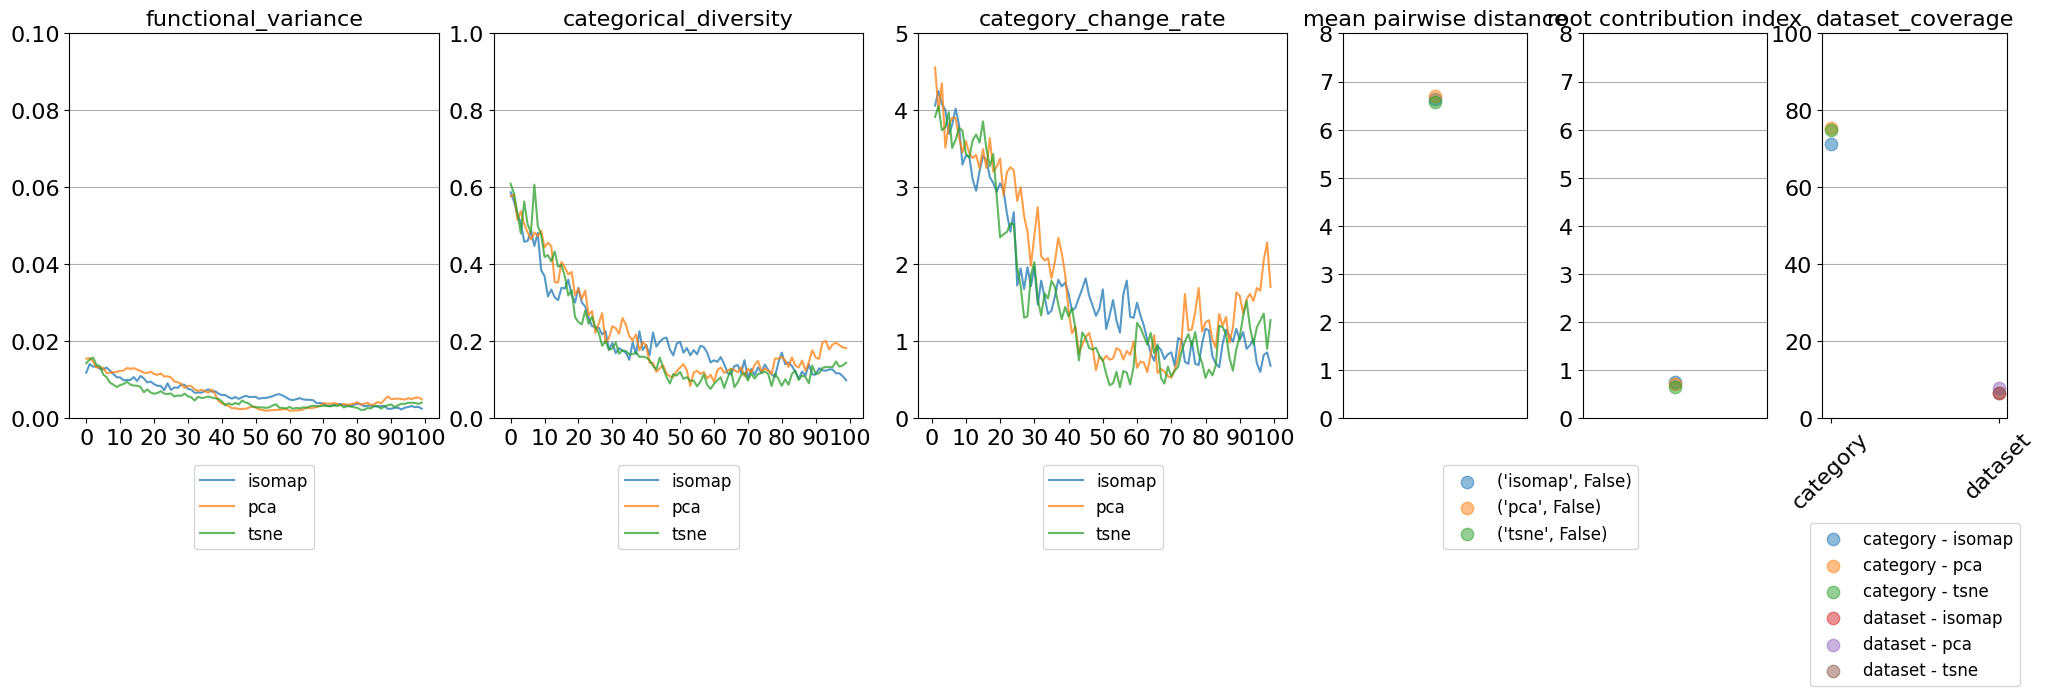

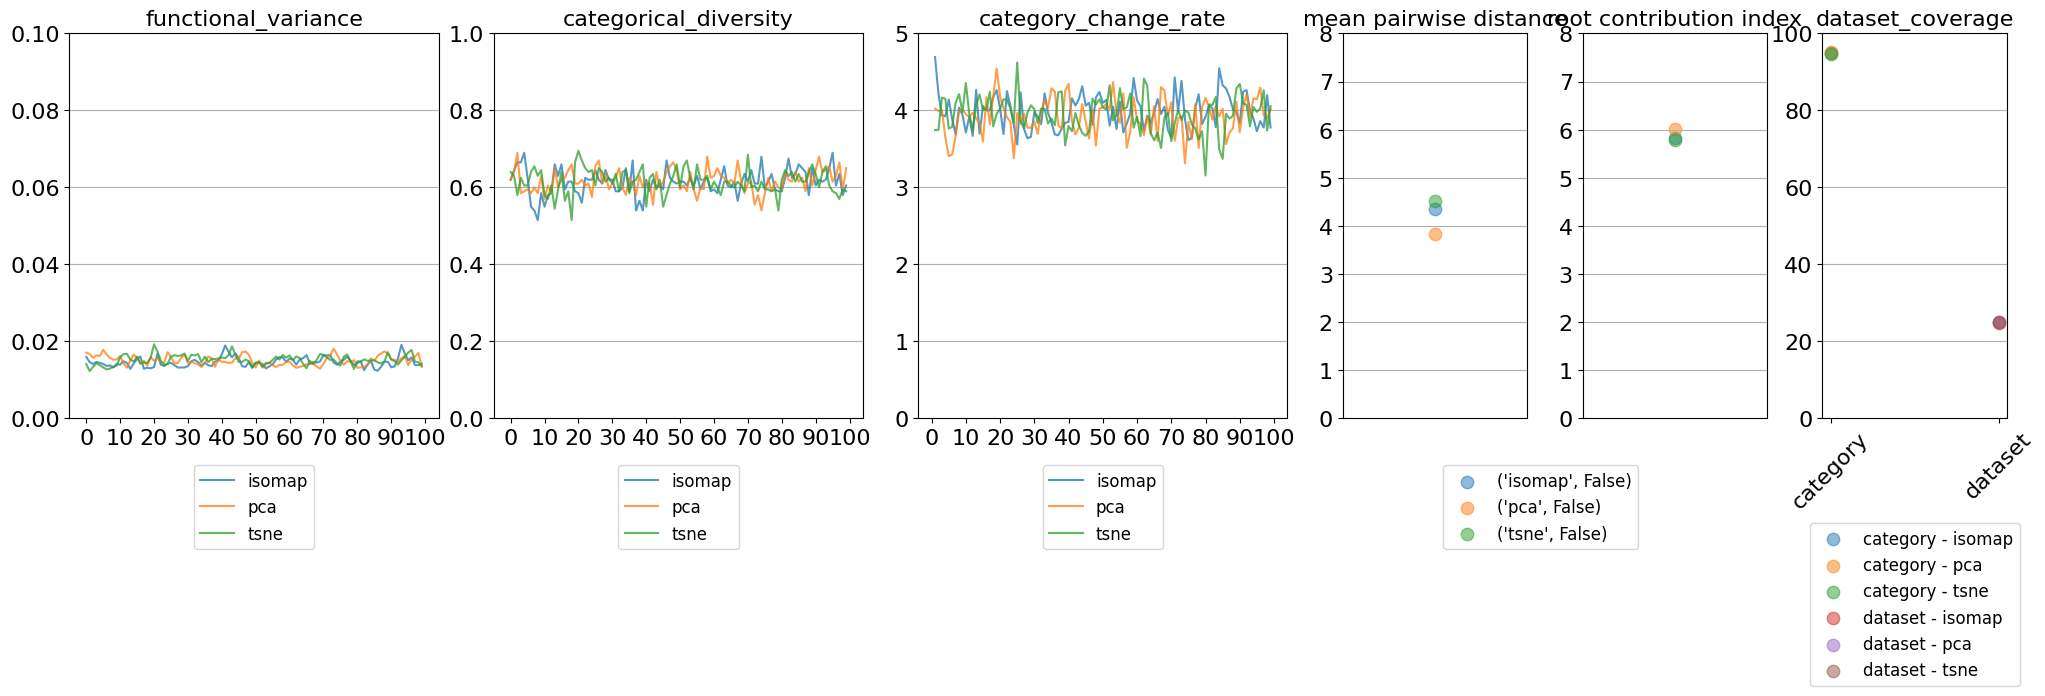

In [94]:
# plot case 1
from textwrap import wrap

df_plot_sub = df_plot[
    [
        "phylo_diversity_novelty_index",
        "categorical_diversity_novelty_index",
        "category_change_rate",
        "dataset_coverage",
        "category_coverage",
        "root_contribution_index",
        "mean_pairwise_distance",
        "crossover_rate",
        "mutation_rate",
        "mutation_scale",
        "population_size",
        "projection_method",
        "functional_variance",
        "categorical_diversity",
        "unique_closest_in_corpus",
    ]
].copy()
plot_metrics = [
    "functional_variance",
    "categorical_diversity",
    "category_change_rate",
]
scatter_metrics = [
    "mean_pairwise_distance",
    "root_contribution_index",
]
coverage_metrics = [
    "category_coverage",
    "dataset_coverage",
]

metric_lim_map = {
    "category_change_rate": (0, 5),
    "functional_variance": (0, 0.1),
    "categorical_diversity": (0, 1),
    "phylo_diversity_novelty_index": (0, 20),
    "category_coverage": (0, 100),
    "category_coverage_allmids": (0, 100),
    "dataset_coverage": (0, 100),
    "root_contribution_index": (0, 8),
    "mean_pairwise_distance": (0, 8),
}
labels_rename = {
    "run_001": "d n",
    "run_002": "D n",
    "run_003": "d N",
    "run_004": "D N",
}

df_plot_sub = df_plot_sub[df_plot_sub["unique_closest_in_corpus"] == False]
# df_plot_sub = df_plot_sub[df_plot_sub["projection_method"] == "pca"]

for run_i, group in df_plot_sub.groupby(level=1):
    fig, axs = plt.subplots(
        1,
        6,
        figsize=(25, 5),
        gridspec_kw={"width_ratios": [2, 2, 2, 1, 1, 1]},
    )
    # fig.suptitle(f"run {labels_rename.get(run_i)}", fontsize=20)
    i = 0

    # plot metrics
    for metric in plot_metrics:
        axs[i].set_title(metric, fontsize=16)
        for proj_unq_key, group_proj_unq_closest in group.groupby(
            ["projection_method", "unique_closest_in_corpus"]
        ):
            axs[i].plot(
                group_proj_unq_closest[metric].iloc[0],
                label=f"{proj_unq_key[0]}",
                alpha=0.75,
            )
        axs[i].legend(
            fontsize=12,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.1),
        )
        axs[i].set_ylim(*metric_lim_map[metric])
        axs[i].set_xticks(np.arange(0, 101, 10))
        axs[i].tick_params(axis="both", which="major", labelsize=16)
        axs[i].grid(axis="y", linestyle="-")
        i += 1

        # axs[i].set_title(metric, fontsize=16)
        # axs[i].plot(
        #     group_proj[metric].iloc[0],
        #     label=run_i + " - " + proj_i,
        #     # color=colors[i],
        #     alpha=0.75,
        # )
        # axs[i].set_ylim(*metric_lim_map[metric])
        # axs[i].set_xticks(np.arange(0, 101, 10))
        # axs[i].tick_params(axis="both", which="major", labelsize=16)
        # axs[i].grid(axis="y", linestyle="-")
        # i += 1

    # scatter metrics
    legended = False
    for metric in scatter_metrics:
        axs[i].set_title(metric, fontsize=16)
        for proj_unq_key, group_proj_unq_closest in group.groupby(
            ["projection_method", "unique_closest_in_corpus"]
        ):
            axs[i].set_title(
                "\n".join(wrap(metric.replace("_", " "))), fontsize=16
            )
            axs[i].scatter(
                [0],
                group_proj_unq_closest[metric],
                label=f"{proj_unq_key}",
                # color=colors[i],
                alpha=0.5,
                s=80,
            )
            # Annotate dots with values
            # for idx, value in enumerate(group_proj_unq_closest[metric]):
            #     axs[i].annotate(
            #         f"{value:.2f}",
            #         (0, value),
            #         textcoords="offset points",
            #         xytext=(5, 5),
            #         ha="center",
            #         fontsize=14,
            #     )

        if not legended:
            axs[i].legend(
                fontsize=12,
                loc="upper left",
                bbox_to_anchor=(0.5, -0.1),
            )
            legended = True
        axs[i].set_ylim(*metric_lim_map[metric])
        axs[i].set_xticks([])
        axs[i].tick_params(axis="both", which="major", labelsize=16)
        axs[i].grid(axis="y", linestyle="-")

        i += 1

    # # coverage metrics
    axs[i].set_title("coverage", fontsize=16)
    j = 0
    for metric in coverage_metrics:
        axs[i].set_title(metric, fontsize=16)
        for proj_unq_key, group_proj_unq_closest in group.groupby(
            ["projection_method", "unique_closest_in_corpus"]
        ):
            # for proj_i, group_proj in group.groupby("projection_method"):
            label = labels_rename.get(run_i)
            scatter = axs[i].scatter(
                [j],
                group_proj_unq_closest[metric],
                label=f"{metric.split('_')[0]} - {proj_unq_key[0]}",  # {label} -
                # color=colors[i],
                alpha=0.5,
                s=80,
            )
            # Annotate dots with values
            # for idx, value in enumerate(group_proj_unq_closest[metric]):
            #     axs[i].annotate(
            #         f"{value:.2f}",
            #         (j, value),
            #         textcoords="offset points",
            #         xytext=(5, 5),
            #         ha="center",
            #         fontsize=14,
            #     )
        j += 1
        # do not increment i

    axs[i].set_ylim(*metric_lim_map[metric])
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(
        [met.split("_")[0] for met in coverage_metrics],
        fontsize=16,
        rotation=45,
    )
    axs[i].tick_params(axis="both", which="major", labelsize=16)
    axs[i].grid(axis="y", linestyle="-")
    # handles, labels = axs[0].get_legend_handles_labels()
    # labels = [labels_rename.get(label) for label in labels]

    axs[i].legend(
        fontsize=12,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.25),
    )
    # save plot
    plt.savefig(f"plot_output/run_{run_i}_unique_closest_in_corpus.png")
    # plt.savefig(f"plot_output/run_{run_i}_projection_method.png")
plt.show()

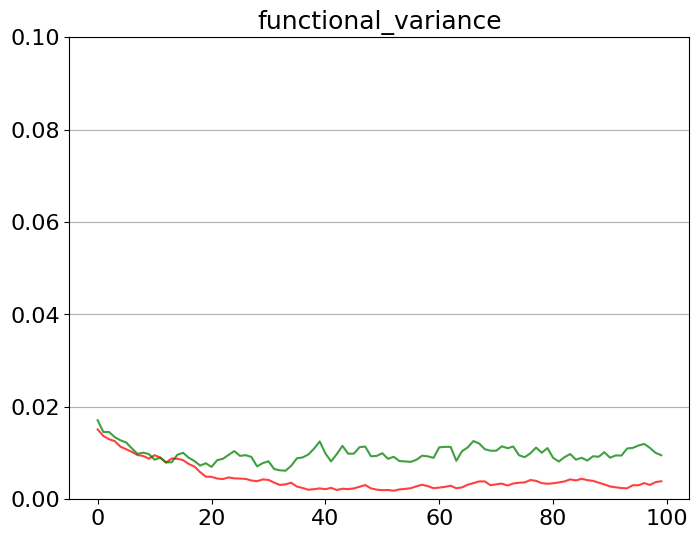

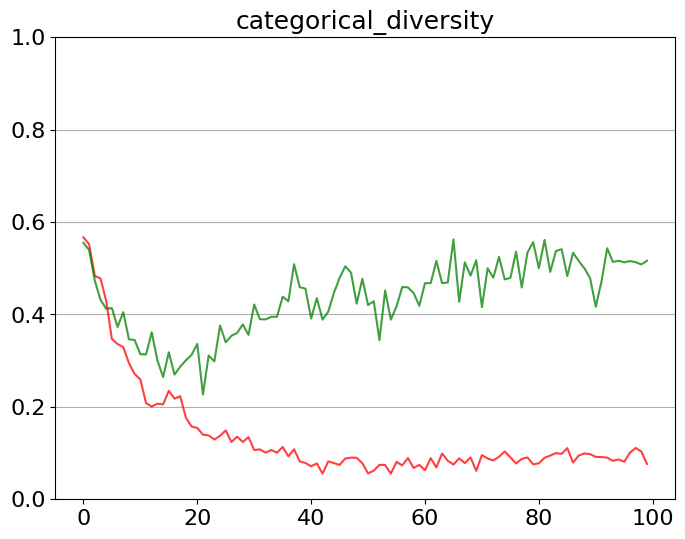

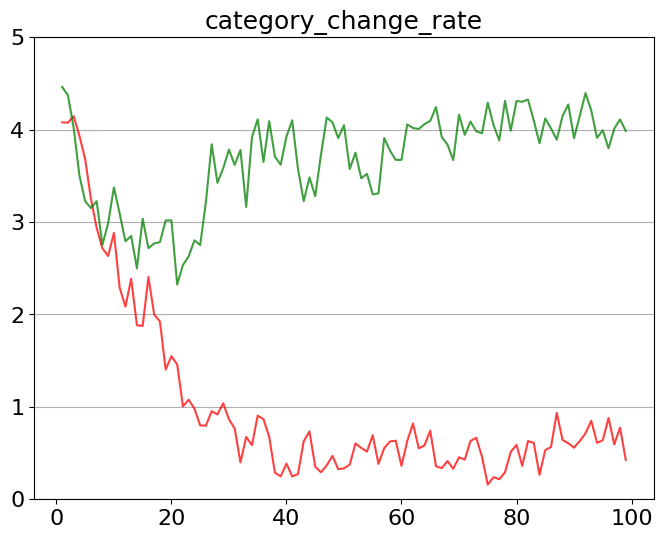

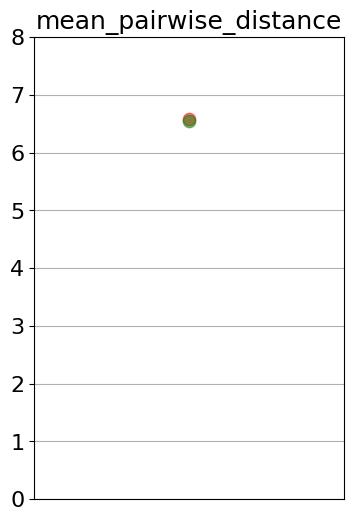

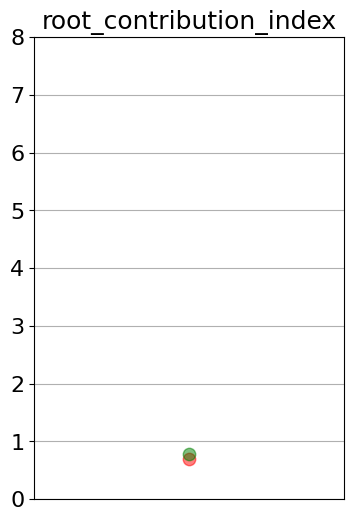

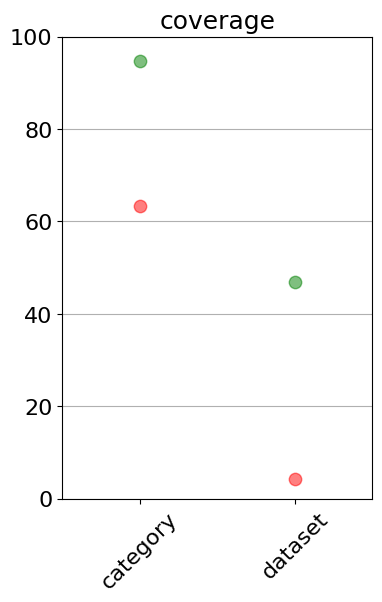

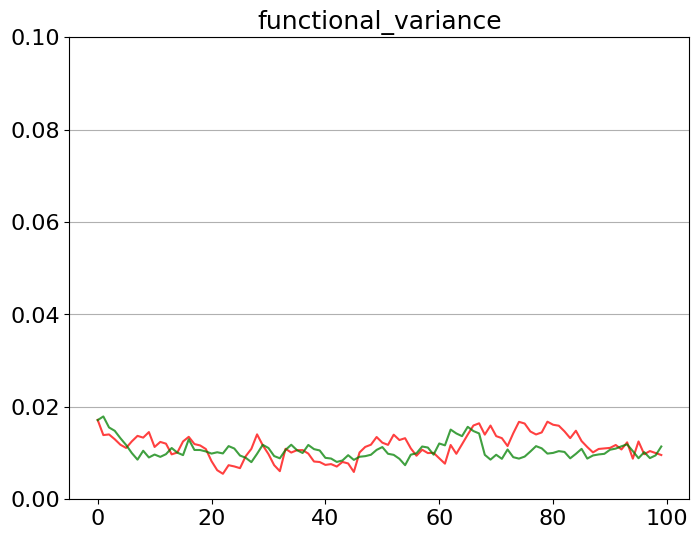

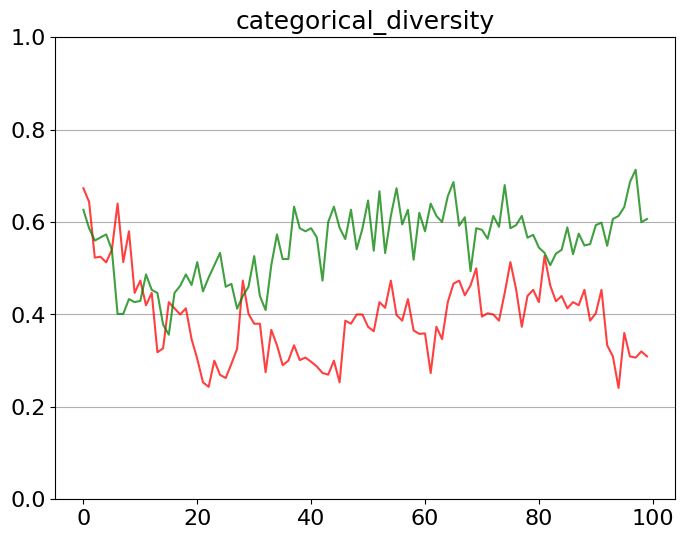

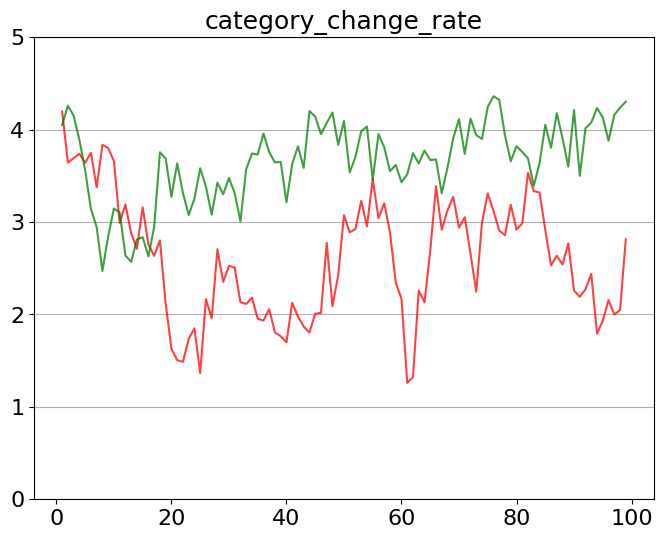

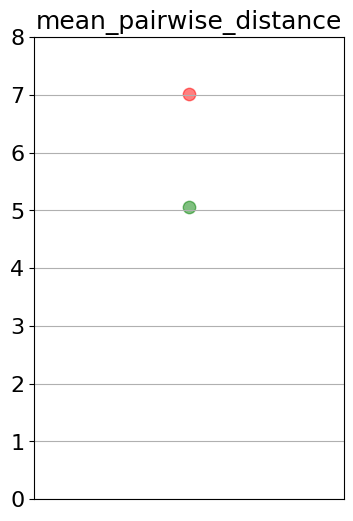

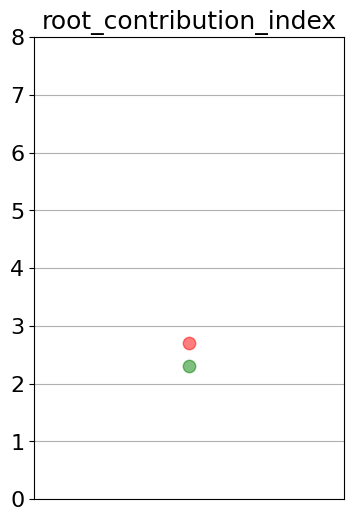

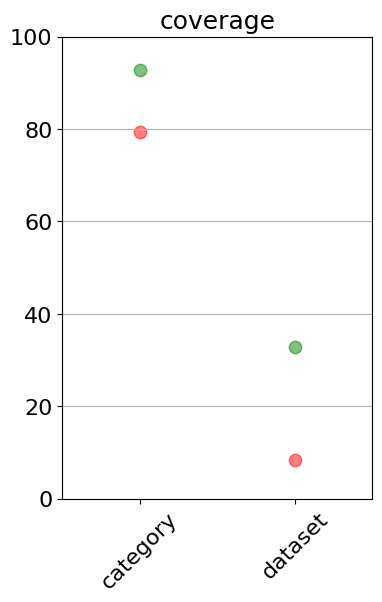

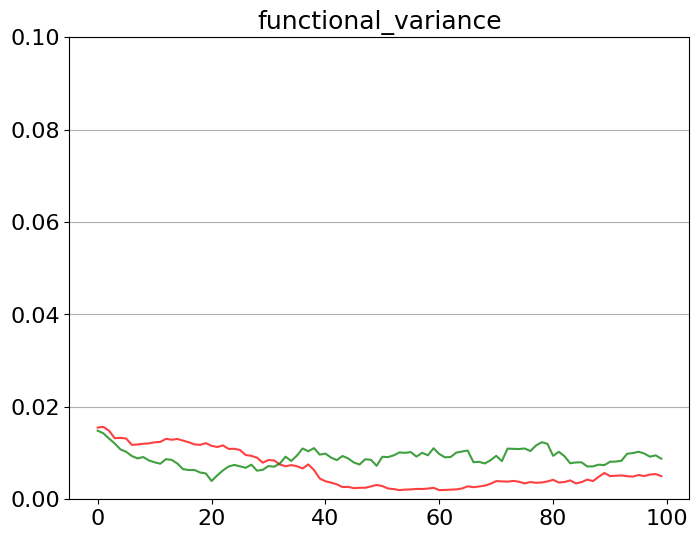

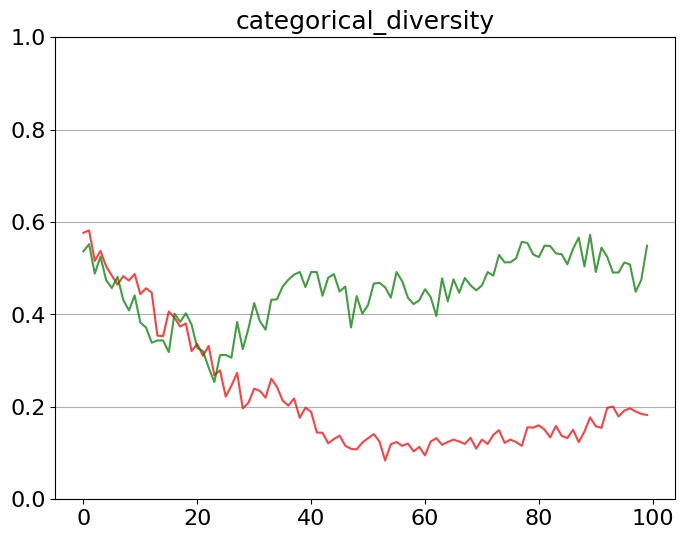

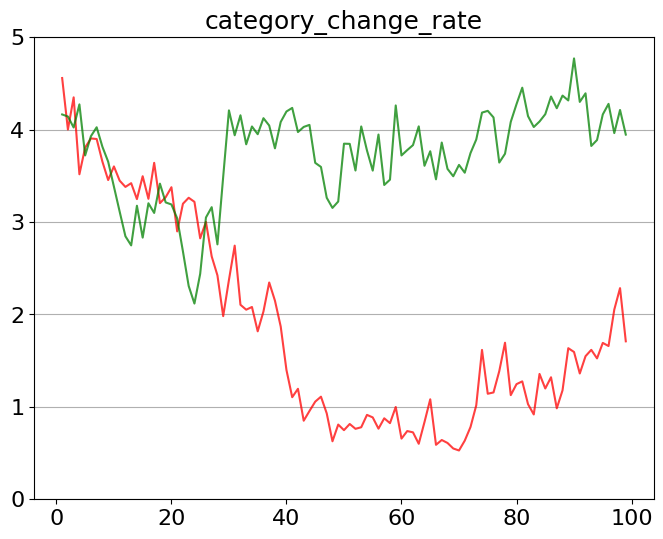

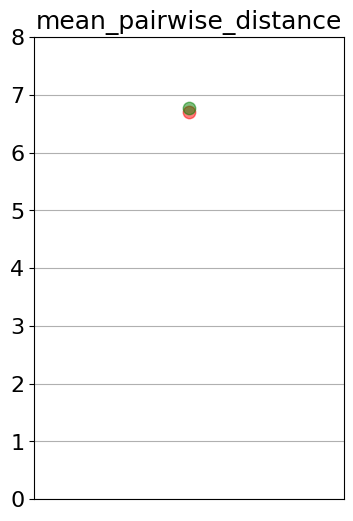

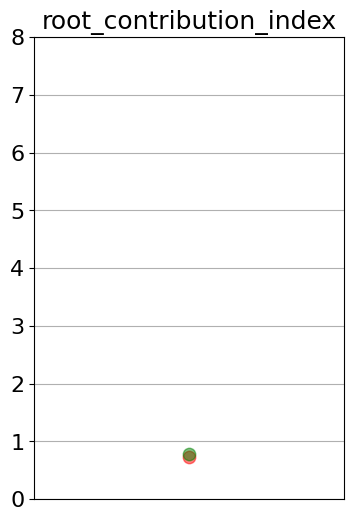

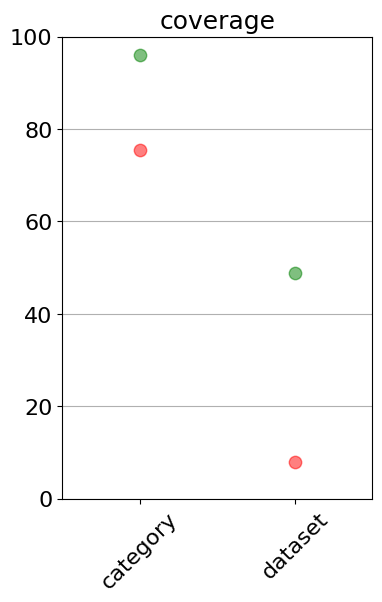

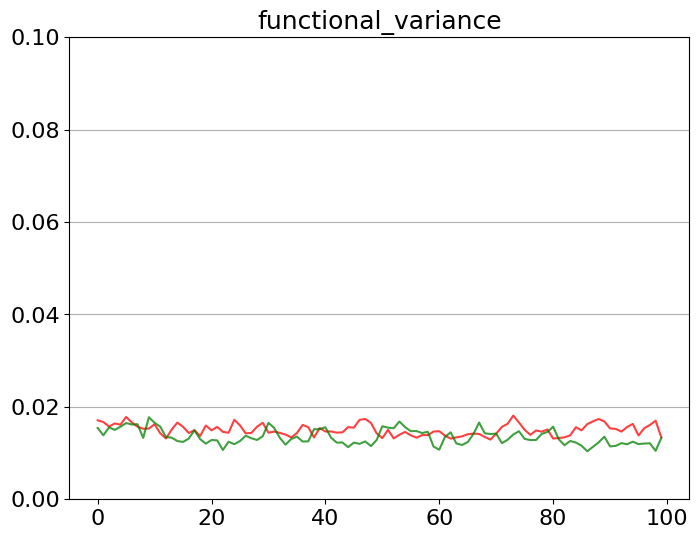

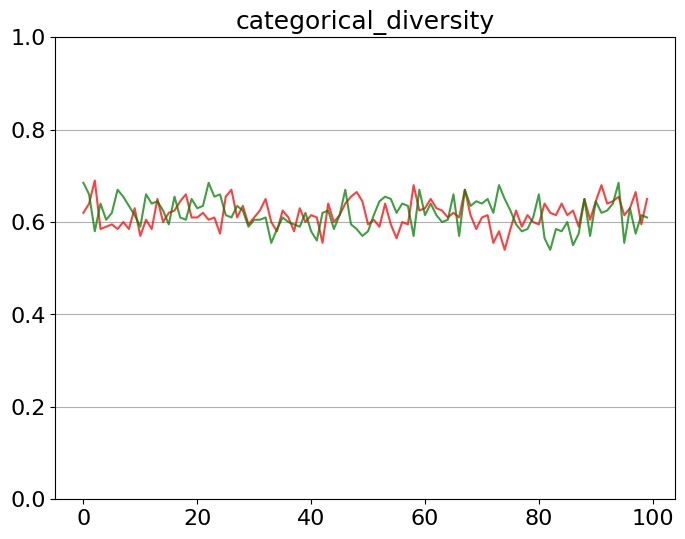

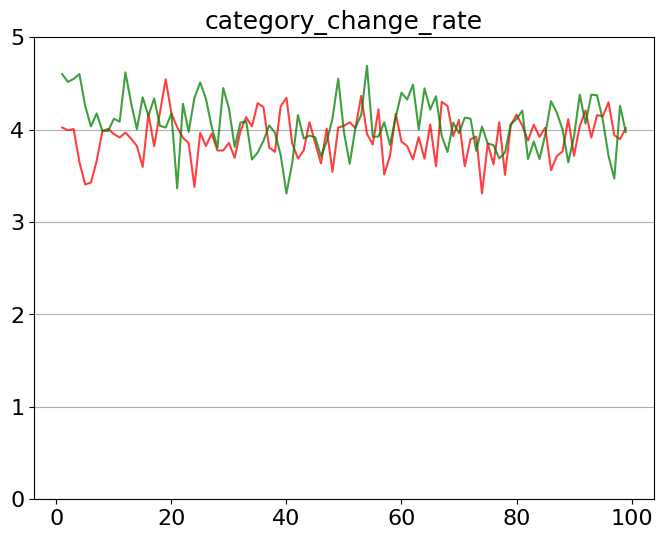

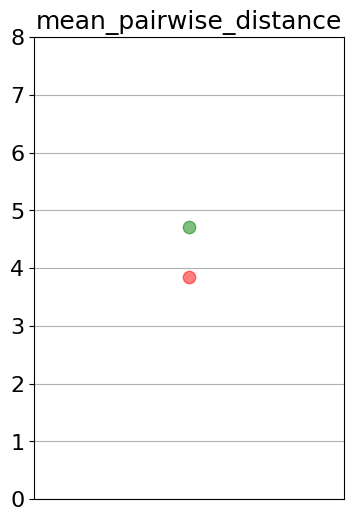

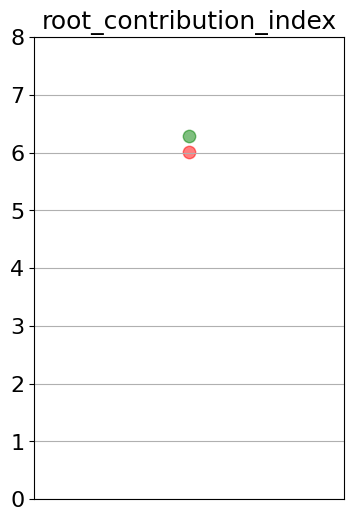

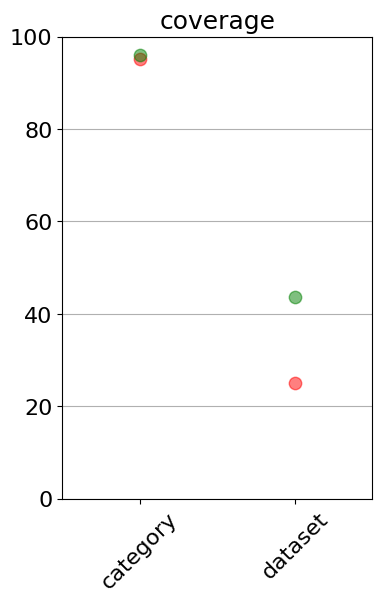

: 

In [ ]:
# plot case 1
from textwrap import wrap

df_plot_sub = df_plot[
    [
        "phylo_diversity_novelty_index",
        "categorical_diversity_novelty_index",
        "category_change_rate",
        "dataset_coverage",
        "category_coverage",
        "root_contribution_index",
        "mean_pairwise_distance",
        "crossover_rate",
        "mutation_rate",
        "mutation_scale",
        "population_size",
        "projection_method",
        "functional_variance",
        "categorical_diversity",
        "unique_closest_in_corpus",
    ]
].copy()
plot_metrics = [
    "functional_variance",
    "categorical_diversity",
    "category_change_rate",
]
scatter_metrics = [
    "mean_pairwise_distance",
    "root_contribution_index",
]
coverage_metrics = [
    "category_coverage",
    "dataset_coverage",
]

metric_lim_map = {
    "category_change_rate": (0, 5),
    "functional_variance": (0, 0.1),
    "categorical_diversity": (0, 1),
    "phylo_diversity_novelty_index": (0, 20),
    "category_coverage": (0, 100),
    "category_coverage_allmids": (0, 100),
    "dataset_coverage": (0, 100),
    "root_contribution_index": (0, 8),
    "mean_pairwise_distance": (0, 8),
}
labels_rename = {
    "run_001": "d n",
    "run_002": "D n",
    "run_003": "d N",
    "run_004": "D N",
}

# df_plot_sub = df_plot_sub[df_plot_sub["unique_closest_in_corpus"] == False]
df_plot_sub = df_plot_sub[
    (df_plot_sub["projection_method"] == "pca")
    # | (df_plot_sub["projection_method"] == "tsne")
]
group_i = 1  # 1
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["red", "green"])

# plt.rcParams["image.cmap"] = "Set1"
# plt.rcParams["axes.prop_cycle"] = plt.cycler(color=plt.cm.Set1.colors)
for run_i, group in df_plot_sub.groupby(level=1):
    # Plot metrics
    for metric in plot_metrics:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(metric, fontsize=18)
        for proj_unq_key, group_proj_unq_closest in group.groupby(
            ["projection_method", "unique_closest_in_corpus"]
        ):
            ax.plot(
                group_proj_unq_closest[metric].iloc[0],
                label=f"{proj_unq_key[group_i]}",
                alpha=0.75,
            )
        # ax.legend(
        #     fontsize=16,
        #     loc="upper center",
        #     bbox_to_anchor=(0.5, -0.1),
        # )
        ax.set_ylim(*metric_lim_map[metric])
        ax.set_xticks(np.arange(0, 101, 20))
        ax.tick_params(axis="both", which="major", labelsize=16)
        ax.grid(axis="y", linestyle="-")
        plt.savefig(f"plot_output_final/final_{group_i}_{run_i}_{metric}.png")
        plt.show()

    # Scatter metrics
    for metric in scatter_metrics:
        fig, ax = plt.subplots(figsize=(4, 6))
        # ax.set_title("\n".join(wrap(metric.replace("_", " "))), fontsize=16)
        ax.set_title(metric, fontsize=18)
        for proj_unq_key, group_proj_unq_closest in group.groupby(
            ["projection_method", "unique_closest_in_corpus"]
        ):
            ax.scatter(
                [0],
                group_proj_unq_closest[metric],
                label=f"{proj_unq_key[group_i]}",
                alpha=0.5,
                s=80,
            )
        # ax.legend(
        #     fontsize=16,
        #     loc="upper left",
        #     bbox_to_anchor=(0.5, -0.1),
        # )
        ax.set_ylim(*metric_lim_map[metric])
        ax.set_xticks([])
        ax.tick_params(axis="both", which="major", labelsize=16)
        ax.grid(axis="y", linestyle="-")
        plt.savefig(f"plot_output_final/final_{group_i}_{run_i}_{metric}.png")
        plt.show()

    # Coverage metrics
    # for metric in coverage_metrics:
    fig, ax = plt.subplots(figsize=(4, 6))
    ax.set_title("coverage", fontsize=18)
    for proj_unq_key, group_proj_unq_closest in group.groupby(
        ["projection_method", "unique_closest_in_corpus"]
    ):
        ax.scatter(
            [0.25, 0.75],
            group_proj_unq_closest[coverage_metrics],
            label=f"{proj_unq_key[group_i]}",
            alpha=0.5,
            s=80,
        )
    ax.set_xlim(0, 1)
    ax.set_ylim(*metric_lim_map[coverage_metrics[0]])
    ax.set_xticks([0.25, 0.75])
    ax.set_xticklabels(
        [met.split("_")[0] for met in coverage_metrics],
        fontsize=16,
        rotation=45,
    )
    ax.tick_params(axis="both", which="major", labelsize=16)
    ax.grid(axis="y", linestyle="-")
    # ax.legend(
    #     fontsize=16,
    #     loc="upper center",
    #     bbox_to_anchor=(0.5, -0.25),
    # )
    plt.savefig(f"plot_output_final/final_{group_i}_{run_i}_coverage.png", bbox_inches="tight")
    plt.show()

''

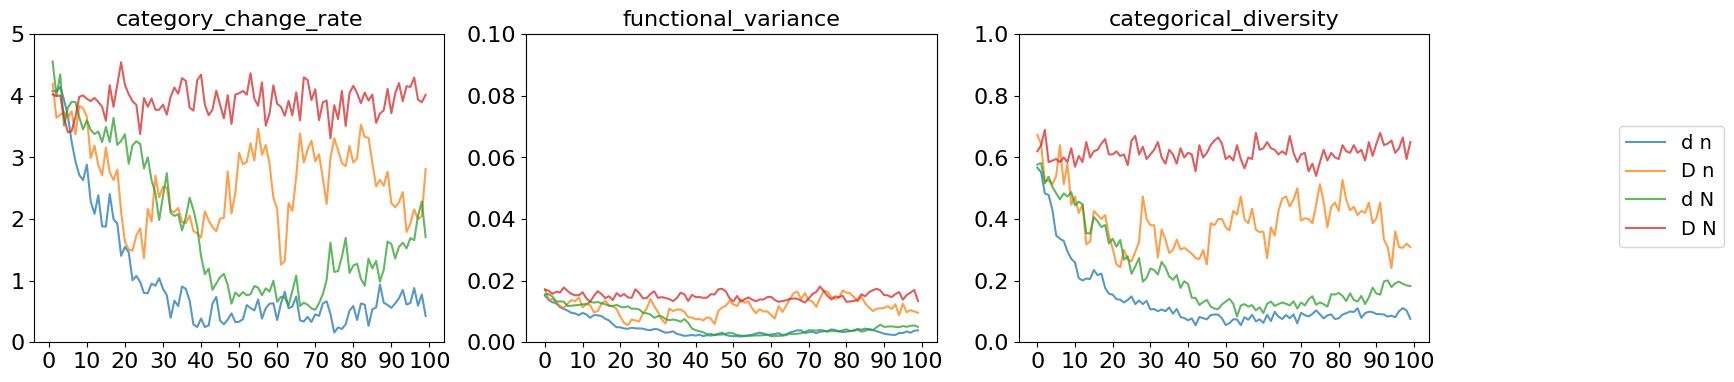

In [92]:
# stage 2 plots all runs in one plot

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 4))
df_plot_sub = df_plot[
    [
        "phylo_diversity_novelty_index",
        "categorical_diversity_novelty_index",
        "category_change_rate",
        "dataset_coverage",
        "category_coverage",
        "root_contribution_index",
        "mean_pairwise_distance",
        "crossover_rate",
        "mutation_rate",
        "mutation_scale",
        "population_size",
        "projection_method",
        "functional_variance",
        "categorical_diversity",
    ]
].copy()
metrics = [
    # "phylo_diversity_novelty_index",
    # "categorical_diversity_novelty_index",
    # "category_coverage",
    # "dataset_coverage",
    "category_change_rate",
    # "root_contribution_index",
    # "mean_pairwise_distance",
    "functional_variance",
    "categorical_diversity",
]

metric_lim_map = {
    "category_coverage": (0, 100),
    "dataset_coverage": (0, 100),
    "category_change_rate": (0, 5),
    "functional_variance": (0, 0.1),
    "categorical_diversity": (0, 1),
}

# df_plot_sub_1 = df_plot_sub[df_plot_sub["population_size"] == popsize]
for i, metric in enumerate(metrics):
    axs[i].set_title(
        # f"p={popsize} co={crossover_rate} mr={mutation_rate} ms={mutation_scale}",
        metric,
        fontsize=16,
    )
    for run_i, group in df_plot_sub.groupby(level=1):
        axs[i].plot(
            group[metric].iloc[0],
            label=run_i,
            # color=colors[i],
            alpha=0.75,
        )
        axs[i].set_ylim(*metric_lim_map[metric])
        axs[i].set_xticks(np.arange(0, 101, 10))
        axs[i].tick_params(axis="both", which="major", labelsize=16)
        axs[i].grid(axis="y")

handles, labels = axs[0].get_legend_handles_labels()
labels_rename = {
    "run_001": "d n",
    "run_002": "D n",
    "run_003": "d N",
    "run_004": "D N",
}
labels = [labels_rename.get(label) for label in labels]
fig.legend(
    handles, labels, fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5)
)
""

ValueError: x and y must be the same size

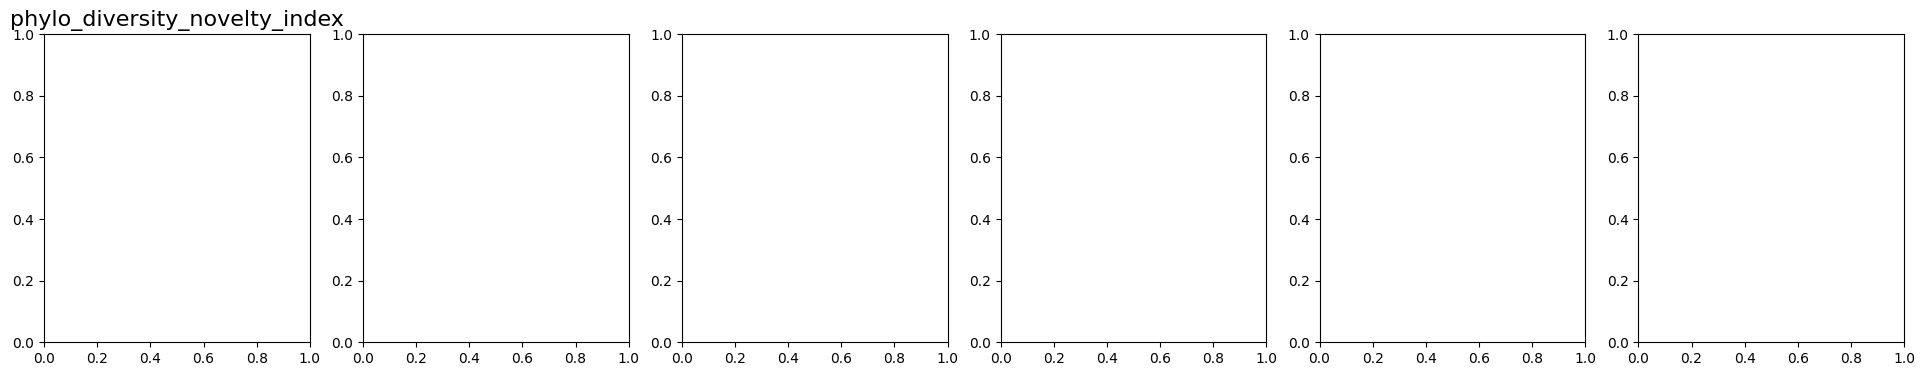

In [93]:
# stage 2 plots idk what this is

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 6, figsize=(24, 4))
df_plot_sub = df_plot[
    [
        "phylo_diversity_novelty_index",
        "categorical_diversity_novelty_index",
        "category_change_rate",
        "dataset_coverage",
        "category_coverage",
        "category_coverage_allmids",
        "root_contribution_index",
        "mean_pairwise_distance",
        "crossover_rate",
        "mutation_rate",
        "mutation_scale",
        "population_size",
        "projection_method",
        "functional_variance",
        "categorical_diversity",
    ]
].copy()
metrics = [
    "phylo_diversity_novelty_index",
    # "categorical_diversity_novelty_index",
    "category_coverage",
    "category_coverage_allmids",
    "dataset_coverage",
    # "category_change_rate",
    "root_contribution_index",
    "mean_pairwise_distance",
    # "functional_variance",
]

metric_lim_map = {
    "phylo_diversity_novelty_index": (0, 20),
    "category_coverage": (0, 100),
    "category_coverage_allmids": (0, 100),
    "dataset_coverage": (0, 100),
    "root_contribution_index": (0, 8),
    "mean_pairwise_distance": (0, 8),
}

metric_y_suffix_map = {
    "phylo_diversity_novelty_index": "",
    "category_coverage": " (%)",
    "category_coverage_allmids": " (%)",
    "dataset_coverage": " (%)",
    "root_contribution_index": "",
    "mean_pairwise_distance": "",
}

for i, metric in enumerate(metrics):
    axs[i].set_title(
        # f"p={popsize} co={crossover_rate} mr={mutation_rate} ms={mutation_scale}",
        metric,
        fontsize=16,
    )
    for run_i, group in df_plot_sub.groupby(level=1):
        axs[i].scatter(
            [0],
            group[metric],
            label=run_i,
            # color=colors[i],
            alpha=0.5,
            s=80,
        )
        axs[i].set_ylim(*metric_lim_map[metric])
        axs[i].set_xticks([])
        axs[i].tick_params(axis="both", which="major", labelsize=16)
        axs[i].grid(axis="y", linestyle="-")

handles, labels = axs[0].get_legend_handles_labels()
labels_rename = {
    "run_001": "d n",
    "run_002": "D n",
    "run_003": "d N",
    "run_004": "D N",
}
labels = [labels_rename.get(label) for label in labels]
plt.legend(
    fontsize=14,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    handles=handles,
    labels=labels,
)
""

# stage 3